<a href="https://colab.research.google.com/github/yraj1996/Bike-Sharing-Demand-Prediction/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# importing libraries for analysis
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing libraries for hypothesis testing
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.weightstats import ztest



from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

bike_df=pd.read_csv('/content/drive/MyDrive/ALMA BETTER Capstone Project/Bike Sharing Demand/SeoulBikeData.csv',encoding ='unicode_escape')

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
#last 5 rows of dataset
bike_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
bike_df.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
bike_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
#null values in dataset
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### What did you know about your dataset?

Our dataset contains 8760 rows and 14 columns.

No null value is present in the datset.

No duplicate observations were present in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
bike_df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description 

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of the day

Temperature- Temperature in Celsius

Humidity - Humidity in %

Windspeed - Windspeed in m/s

Visibility - Visible distance in multiple of 10m

Dew point temperature - Celsius

Solar radiation - Radiation of sun in MJ/m2

Rainfall - Rainfall in mm

Snowfall - Snowfall in cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_bike_count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation', 
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [ ]:
#converting date column to datetime format
bike_df['Date'] = pd.to_datetime(bike_df['Date'], format="%d/%m/%Y", infer_datetime_format='%d%m%Y', exact=True)


In [ ]:
# split day of week, month and year in three column
bike_df['day_of_week'] = bike_df['Date'].dt.day_name()   # extract week name from Date column
bike_df["month"] = bike_df['Date'].dt.month_name()       # extract month name from Date column
bike_df["year"] = bike_df['Date'].map(lambda x: x.year).astype("object")

In [ ]:
#new column that indicates whether each row corresponds to a weekday or a weekend:
bike_df['weekday'] = bike_df['Date'].dt.weekday < 5

In [ ]:
bike_df['Functioning_Day'] = bike_df['Functioning_Day'].apply(lambda x:1 if x=='Yes' else 0)

In [ ]:
bike_df['Holiday'] = bike_df['Holiday'].apply(lambda x:1 if x=='Holiday' else 0)

In [ ]:
bike_df['Holiday'].value_counts()

0    8328
1     432
Name: Holiday, dtype: int64

In [ ]:
bike_df['Functioning_Day'].value_counts()

1    8465
0     295
Name: Functioning_Day, dtype: int64

### What all manipulations have you done and insights you found?

Converted "Functionioning Day" column values to binary values.

Converted "Holiday" column values to binary values.

Converted "Date" column to Datetime format.

Extracted Day of week, Month, Year from date to make separate features.

Introduced a column "weekday" that represents whether there was a weekend or weekday on respective date.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Univariate Analysis

#### Chart - 1

<Axes: xlabel='Rented_bike_count', ylabel='Count'>

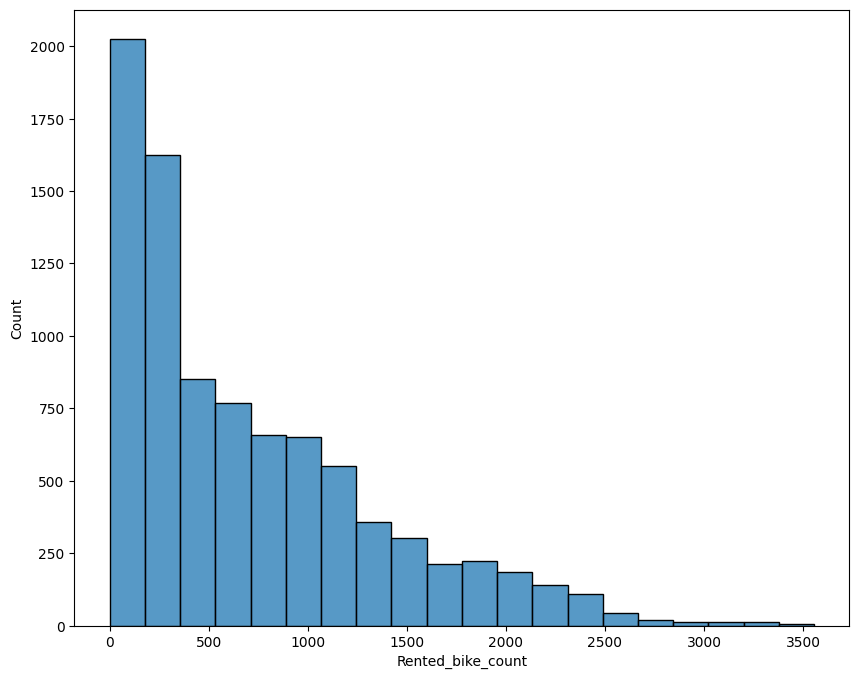

In [ ]:
#Disribution of target variable
plt.subplots(figsize=(10,8))
sns.histplot(data=bike_df, x=bike_df['Rented_bike_count'],bins=20)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* Dependent variable distribution is slightly right skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

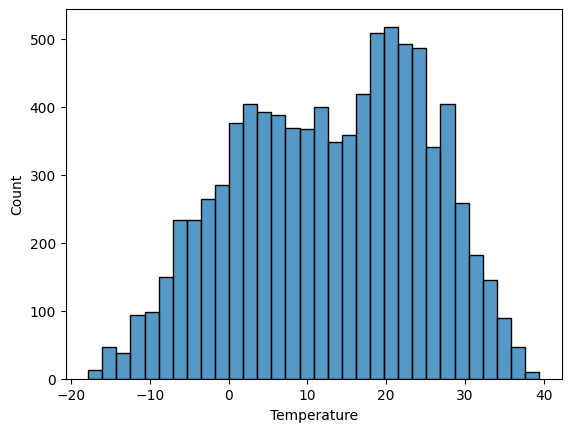

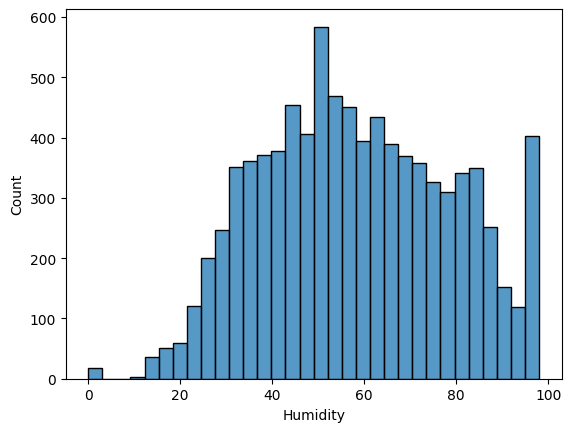

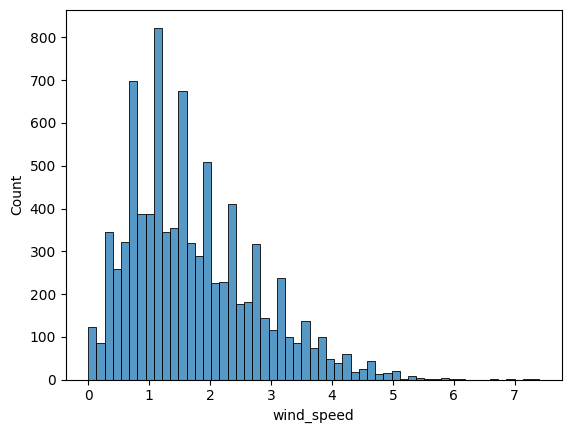

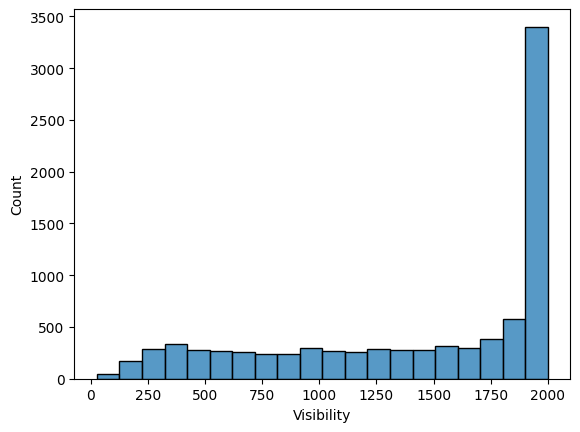

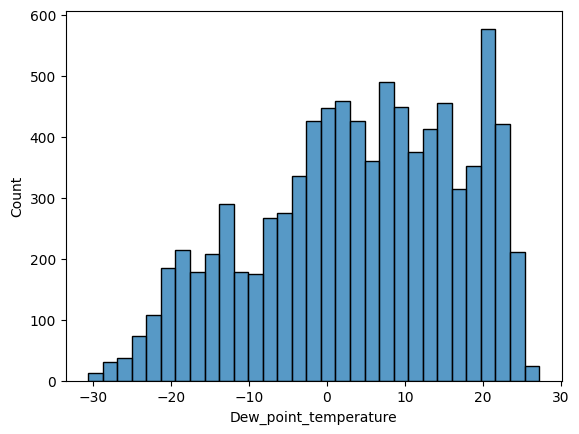

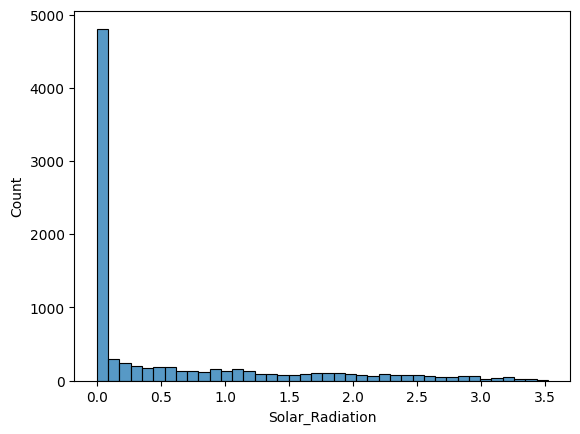

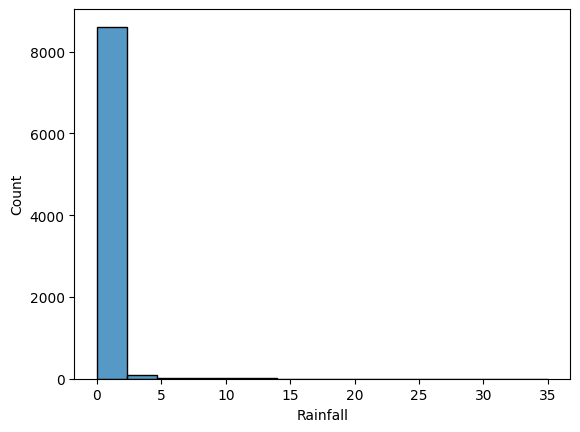

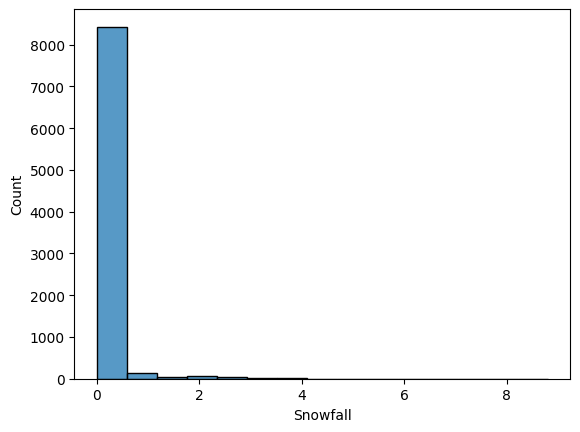

In [ ]:
# Chart - 2 visualization code
#plotting histplot for various features
numerical_columns=list(['Temperature', 'Humidity', 'wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'])

for i in numerical_columns:
  sns.histplot(x=bike_df[i])
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
bike_df.columns

Index(['Date', 'Rented_bike_count', 'Hour', 'Temperature', 'Humidity',
       'wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day',
       'day_of_week', 'month', 'year', 'weekday'],
      dtype='object')

In [ ]:
bike_df.head()

Date  Rented_bike_count  Hour  Temperature  Humidity  wind_speed  \
0 2017-12-01                254     0         -5.2        37         2.2   
1 2017-12-01                204     1         -5.5        38         0.8   
2 2017-12-01                173     2         -6.0        39         1.0   
3 2017-12-01                107     3         -6.2        40         0.9   
4 2017-12-01                 78     4         -6.0        36         2.3   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons  Holiday  Functioning_Day day_of_week     month  year  weekday  
0  Winter        0                1      Friday  December  2017     True  
1  Winter        0                1      Friday  December  2017     True  
2  Winter        0                1      Friday  December  2017     True  
3  Winter        0                1      Friday  December  2017     True  
4  Winter        0                1      Friday  December  2017     True

#### Chart - 3

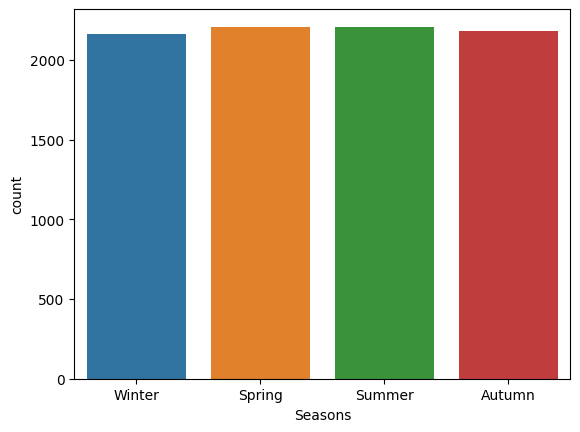

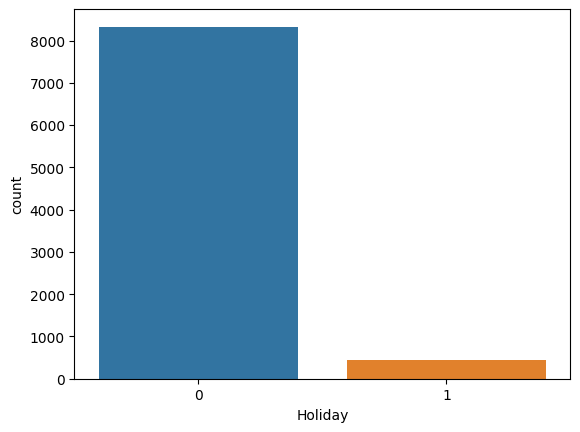

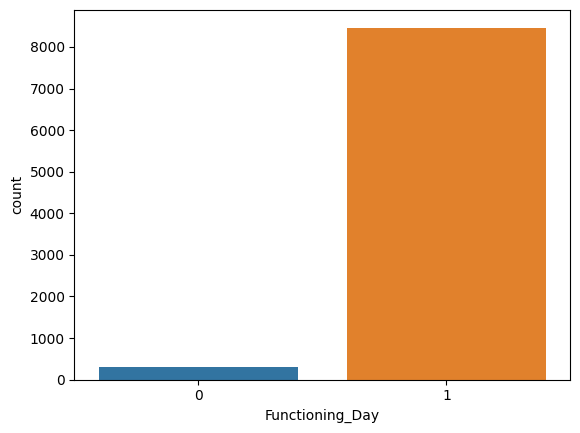

In [ ]:
# Chart - 3 visualization code
#plotting barchart for categorical columns
categorical=['Seasons', 'Holiday', 'Functioning_Day']
for i in categorical:
  sns.countplot(data=bike_df, x=i)
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Observations for all four seasons are fairly equal.
Observations for Holidays are very less compared to Non- Holiday observations.
Observations for Functioning days are very large and Non functioning day are very less.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### Bivariate Analysis

#### Chart - 4

In [ ]:
bike_df.columns

Index(['Date', 'Rented_bike_count', 'Hour', 'Temperature', 'Humidity',
       'wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day',
       'day_of_week', 'month', 'year', 'weekday'],
      dtype='object')

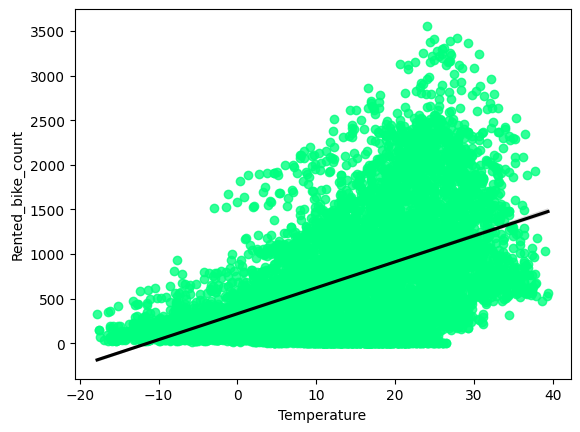

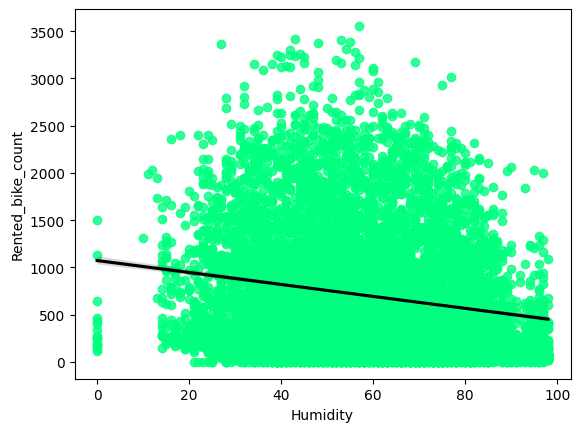

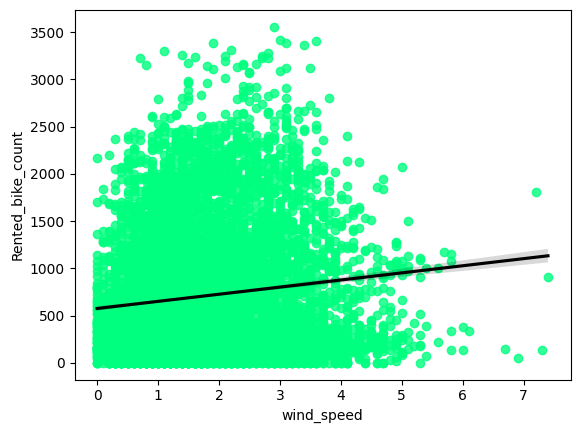

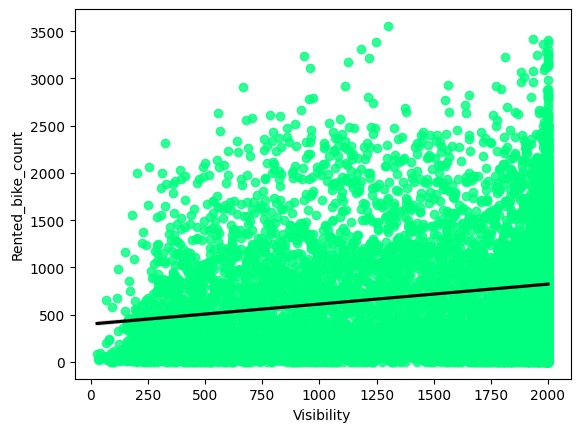

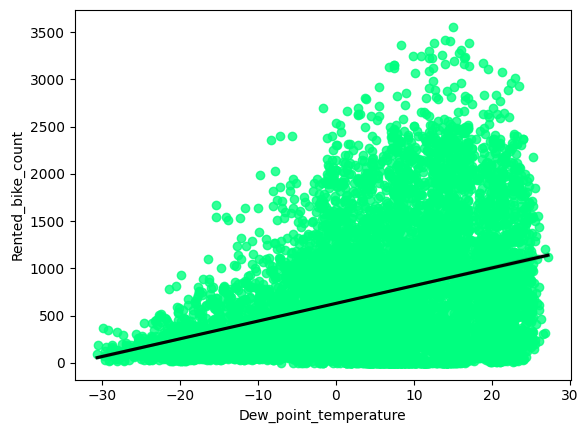

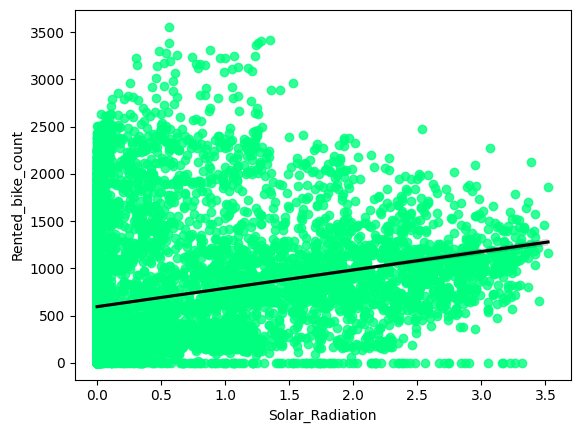

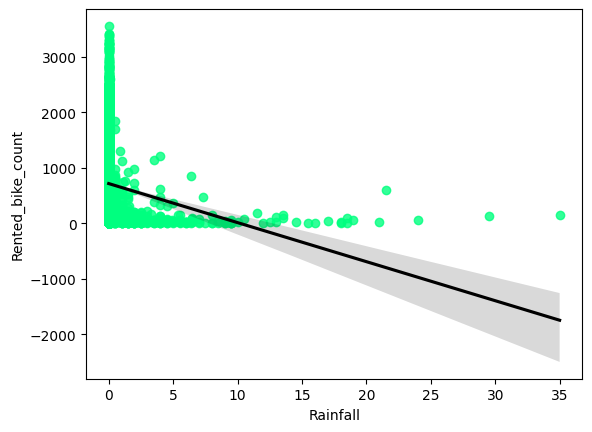

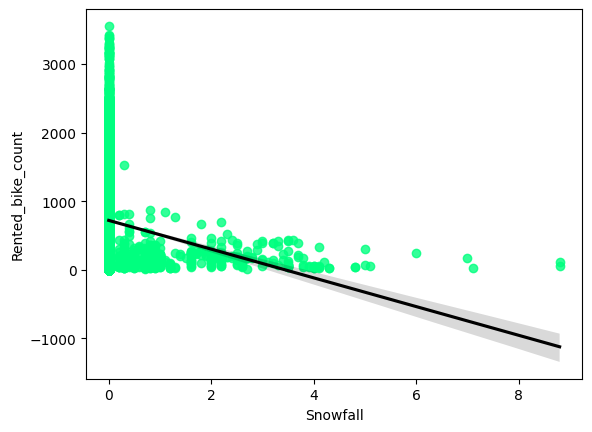

In [ ]:
#Understanding relationship of variables with target variable using regplot
for i in numerical_columns:
  sns.regplot(bike_df, x=i, y='Rented_bike_count',line_kws={"color": "black"},scatter_kws={"color": 'springgreen'})
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?


* General trend is as the temperature increases number of bike rentals also increases.
* Bike rental count decreases with increase in Humidity.
* Bike Rentals are fairly invariable of Wind speed but a faint increase can be seen in the trendline.
* Bike Rentals mildly increases with increase in Visibility
* Sharp increase can be noted with increase in Dew Point temperature.
* On an average, Rented bike counts increases with increase in Solar Raiation.
* Decline in Bike Rentals is seen with increase in Rainfall.
* Decline in Bike Rentals is seen with increase in Snowfall.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Axes: xlabel='weekday', ylabel='Rented_bike_count'>

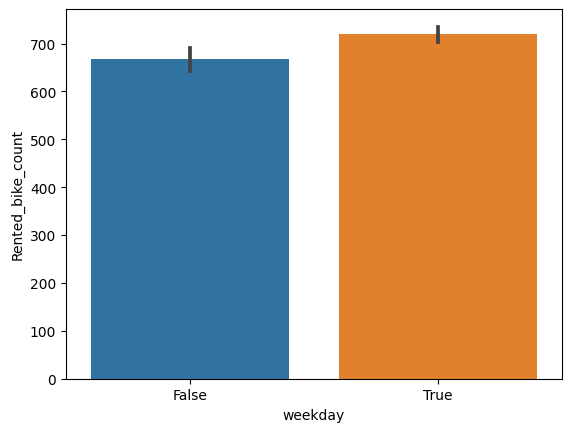

In [ ]:
sns.barplot(x='weekday', y='Rented_bike_count', data=bike_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

<Axes: xlabel='Holiday', ylabel='Rented_bike_count'>

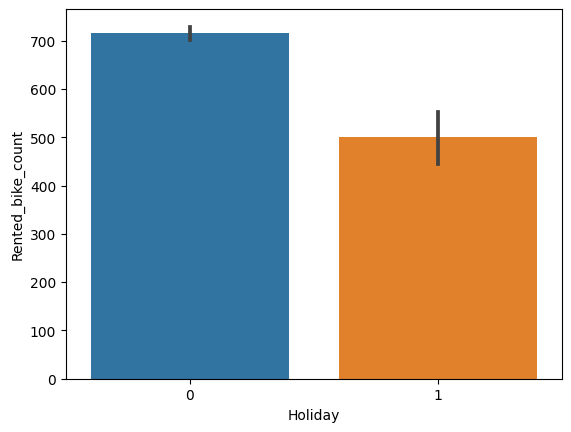

In [ ]:
sns.barplot(x='Holiday',y='Rented_bike_count',data=bike_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

<Axes: xlabel='Seasons', ylabel='Rented_bike_count'>

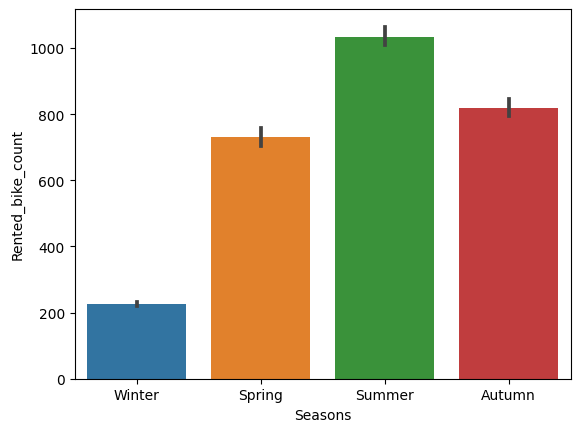

In [ ]:
sns.barplot(data=bike_df,x='Seasons',y='Rented_bike_count')

<Axes: xlabel='Hour', ylabel='Rented_bike_count'>

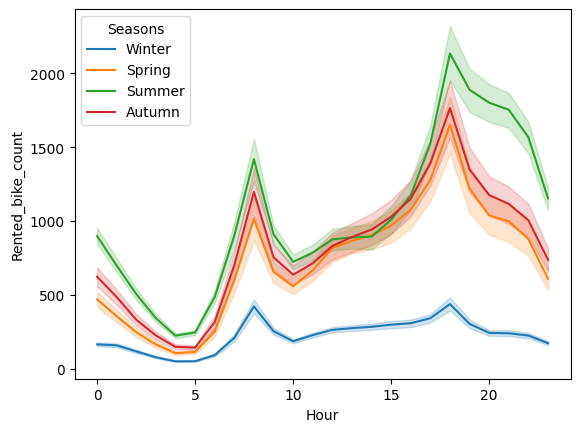

In [ ]:
sns.lineplot(data=bike_df,x='Hour',y='Rented_bike_count',hue='Seasons')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<Axes: xlabel='day_of_week', ylabel='Rented_bike_count'>

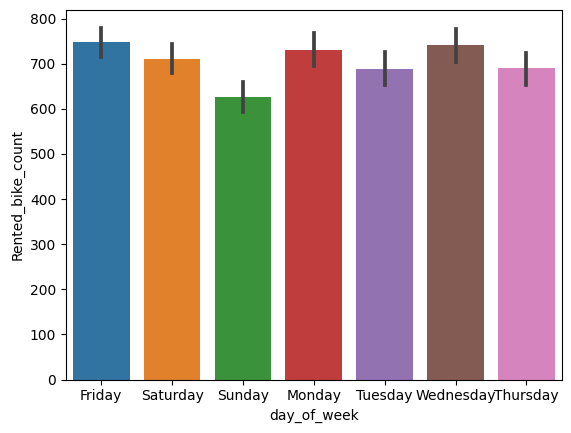

In [ ]:
sns.barplot(x='day_of_week',data=bike_df, y='Rented_bike_count')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

<Axes: xlabel='month', ylabel='Rented_bike_count'>

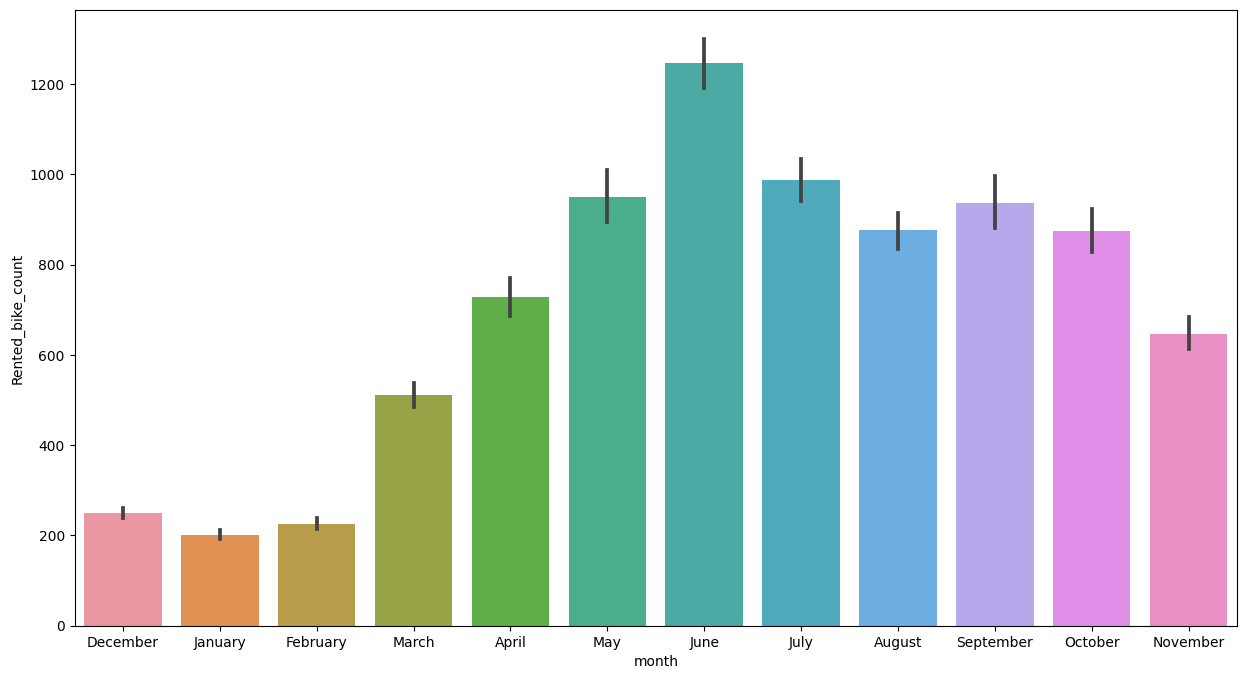

In [ ]:
plt.subplots(figsize=(15,8))
sns.barplot(x='month',data=bike_df, y='Rented_bike_count')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

Text(0.5, 1.0, 'Hour vs Rented Bike count')

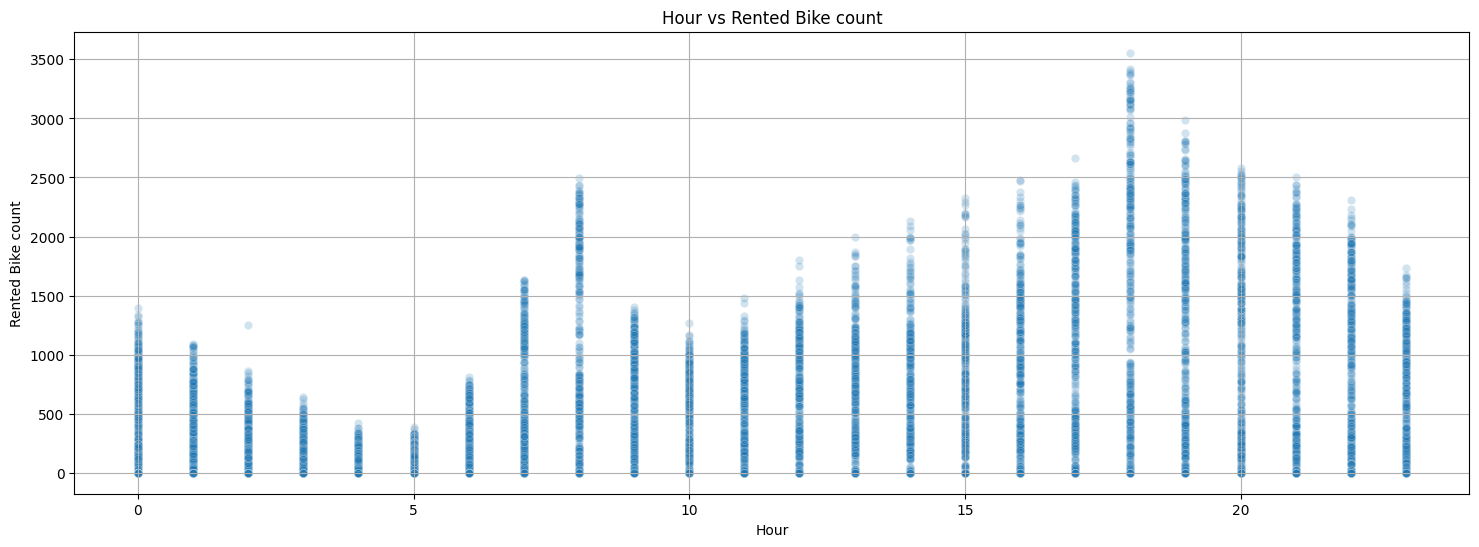

In [ ]:
plt.figure(figsize=(18,6))
plt.grid()
sns.scatterplot(bike_df, x='Hour', y='Rented_bike_count', alpha=0.2)
plt.ylabel("Rented Bike count")
plt.title('Hour vs Rented Bike count')

<Axes: xlabel='Hour', ylabel='Rented_bike_count'>

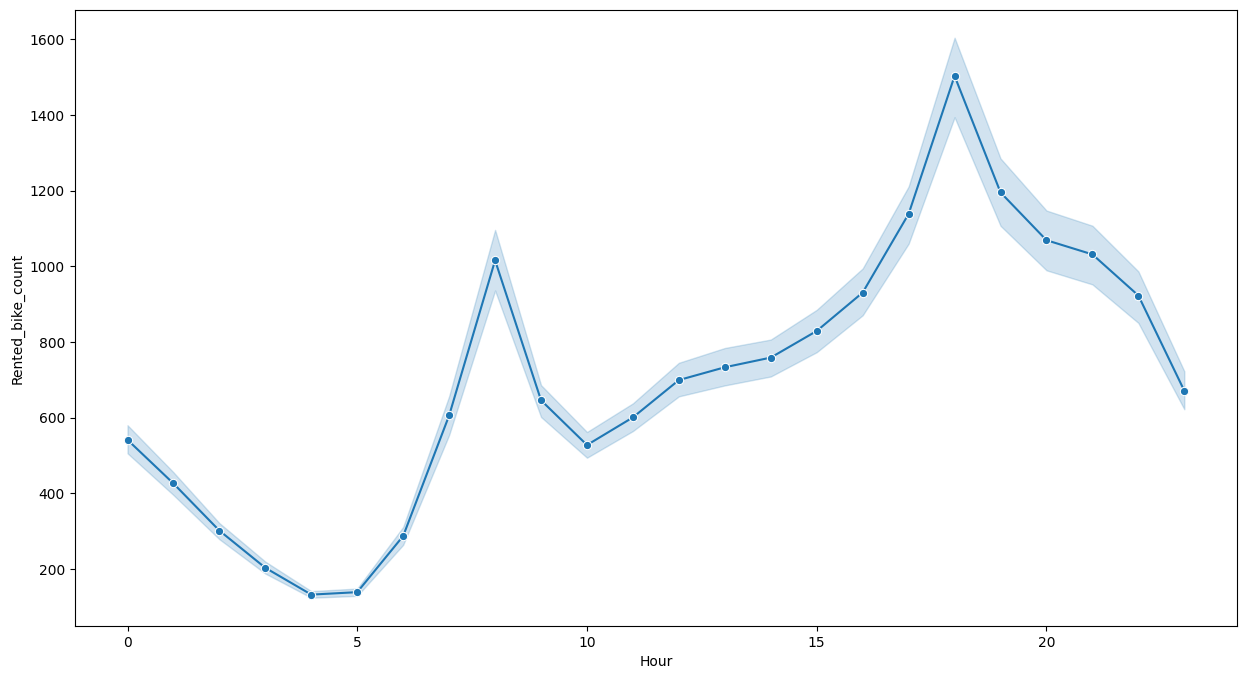

In [ ]:
plt.subplots(figsize=(15,8))
sns.lineplot(x='Hour',data=bike_df, y='Rented_bike_count',linestyle='-',marker='o')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### Multivariate Analysis

#### Chart - 11

Text(0.5, 1.0, 'Hour vs Rented Bike count vs days')

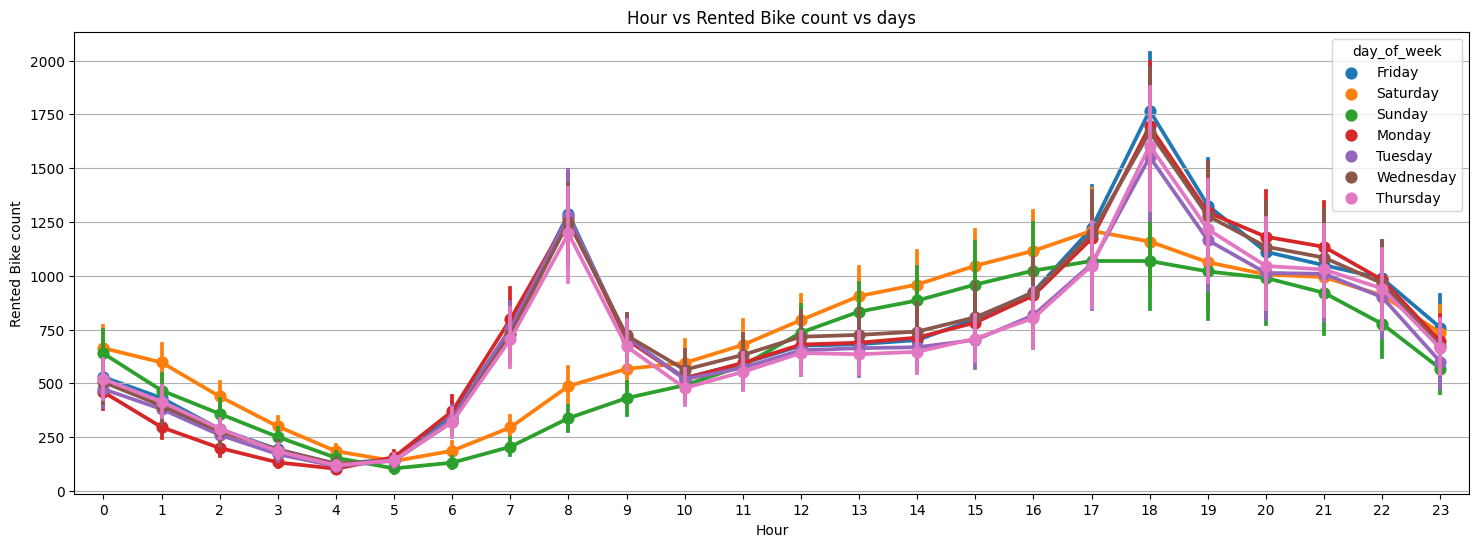

In [ ]:
plt.figure(figsize=(18,6))
plt.grid()
sns.pointplot(bike_df, x='Hour', y='Rented_bike_count', markers='o', hue='day_of_week')
plt.ylabel("Rented Bike count")
plt.title('Hour vs Rented Bike count vs days')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

Text(0.5, 1.0, 'Hour vs Rented Bike count vs days')

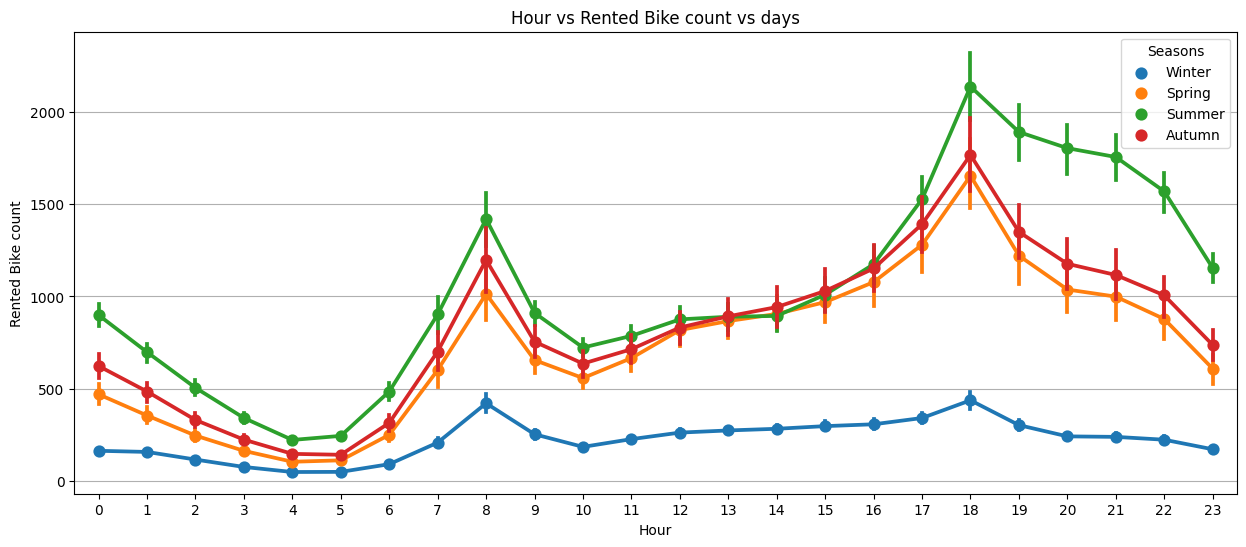

In [ ]:
plt.figure(figsize=(15,6))
plt.grid()
sns.pointplot(bike_df, x='Hour', y='Rented_bike_count', markers='o', hue='Seasons')
plt.ylabel("Rented Bike count")
plt.title('Hour vs Rented Bike count vs days')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

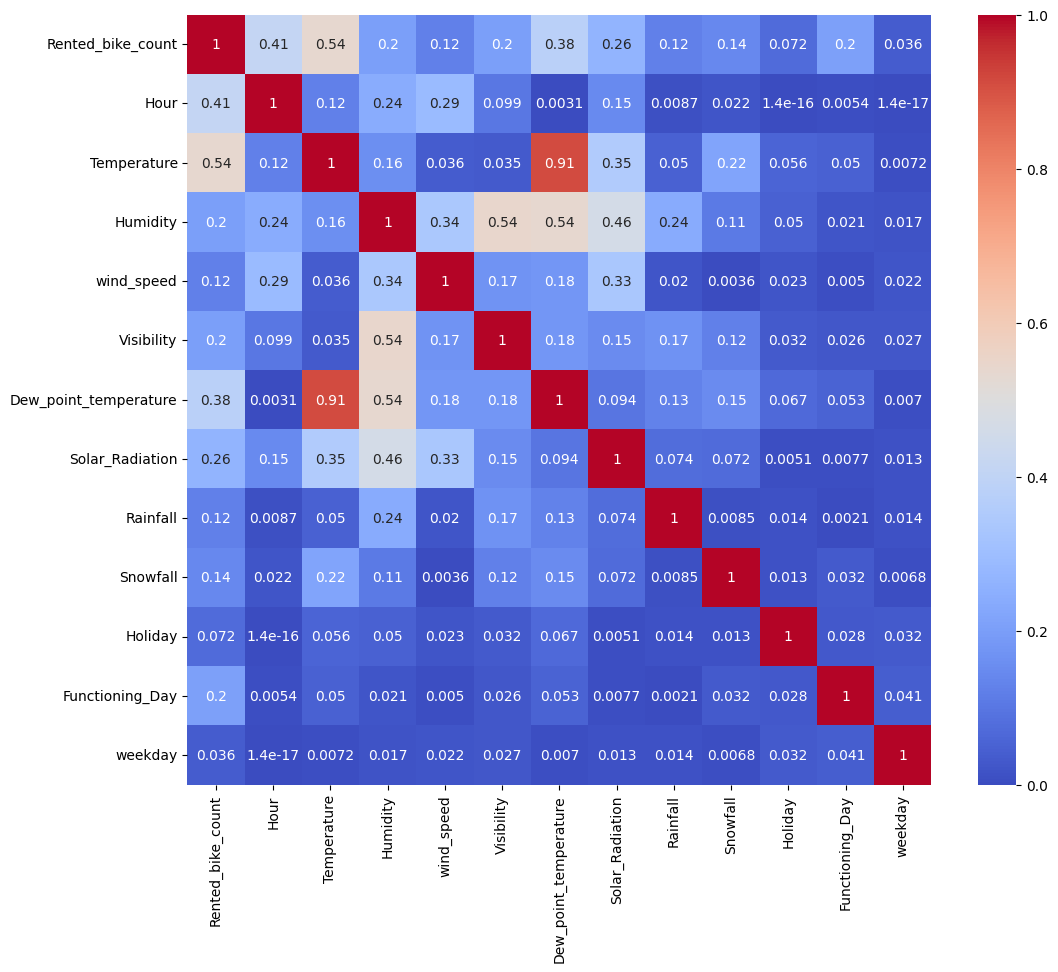

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,10))
sns.heatmap(bike_df.corr().abs(), annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

<Figure size 1500x1000 with 0 Axes>

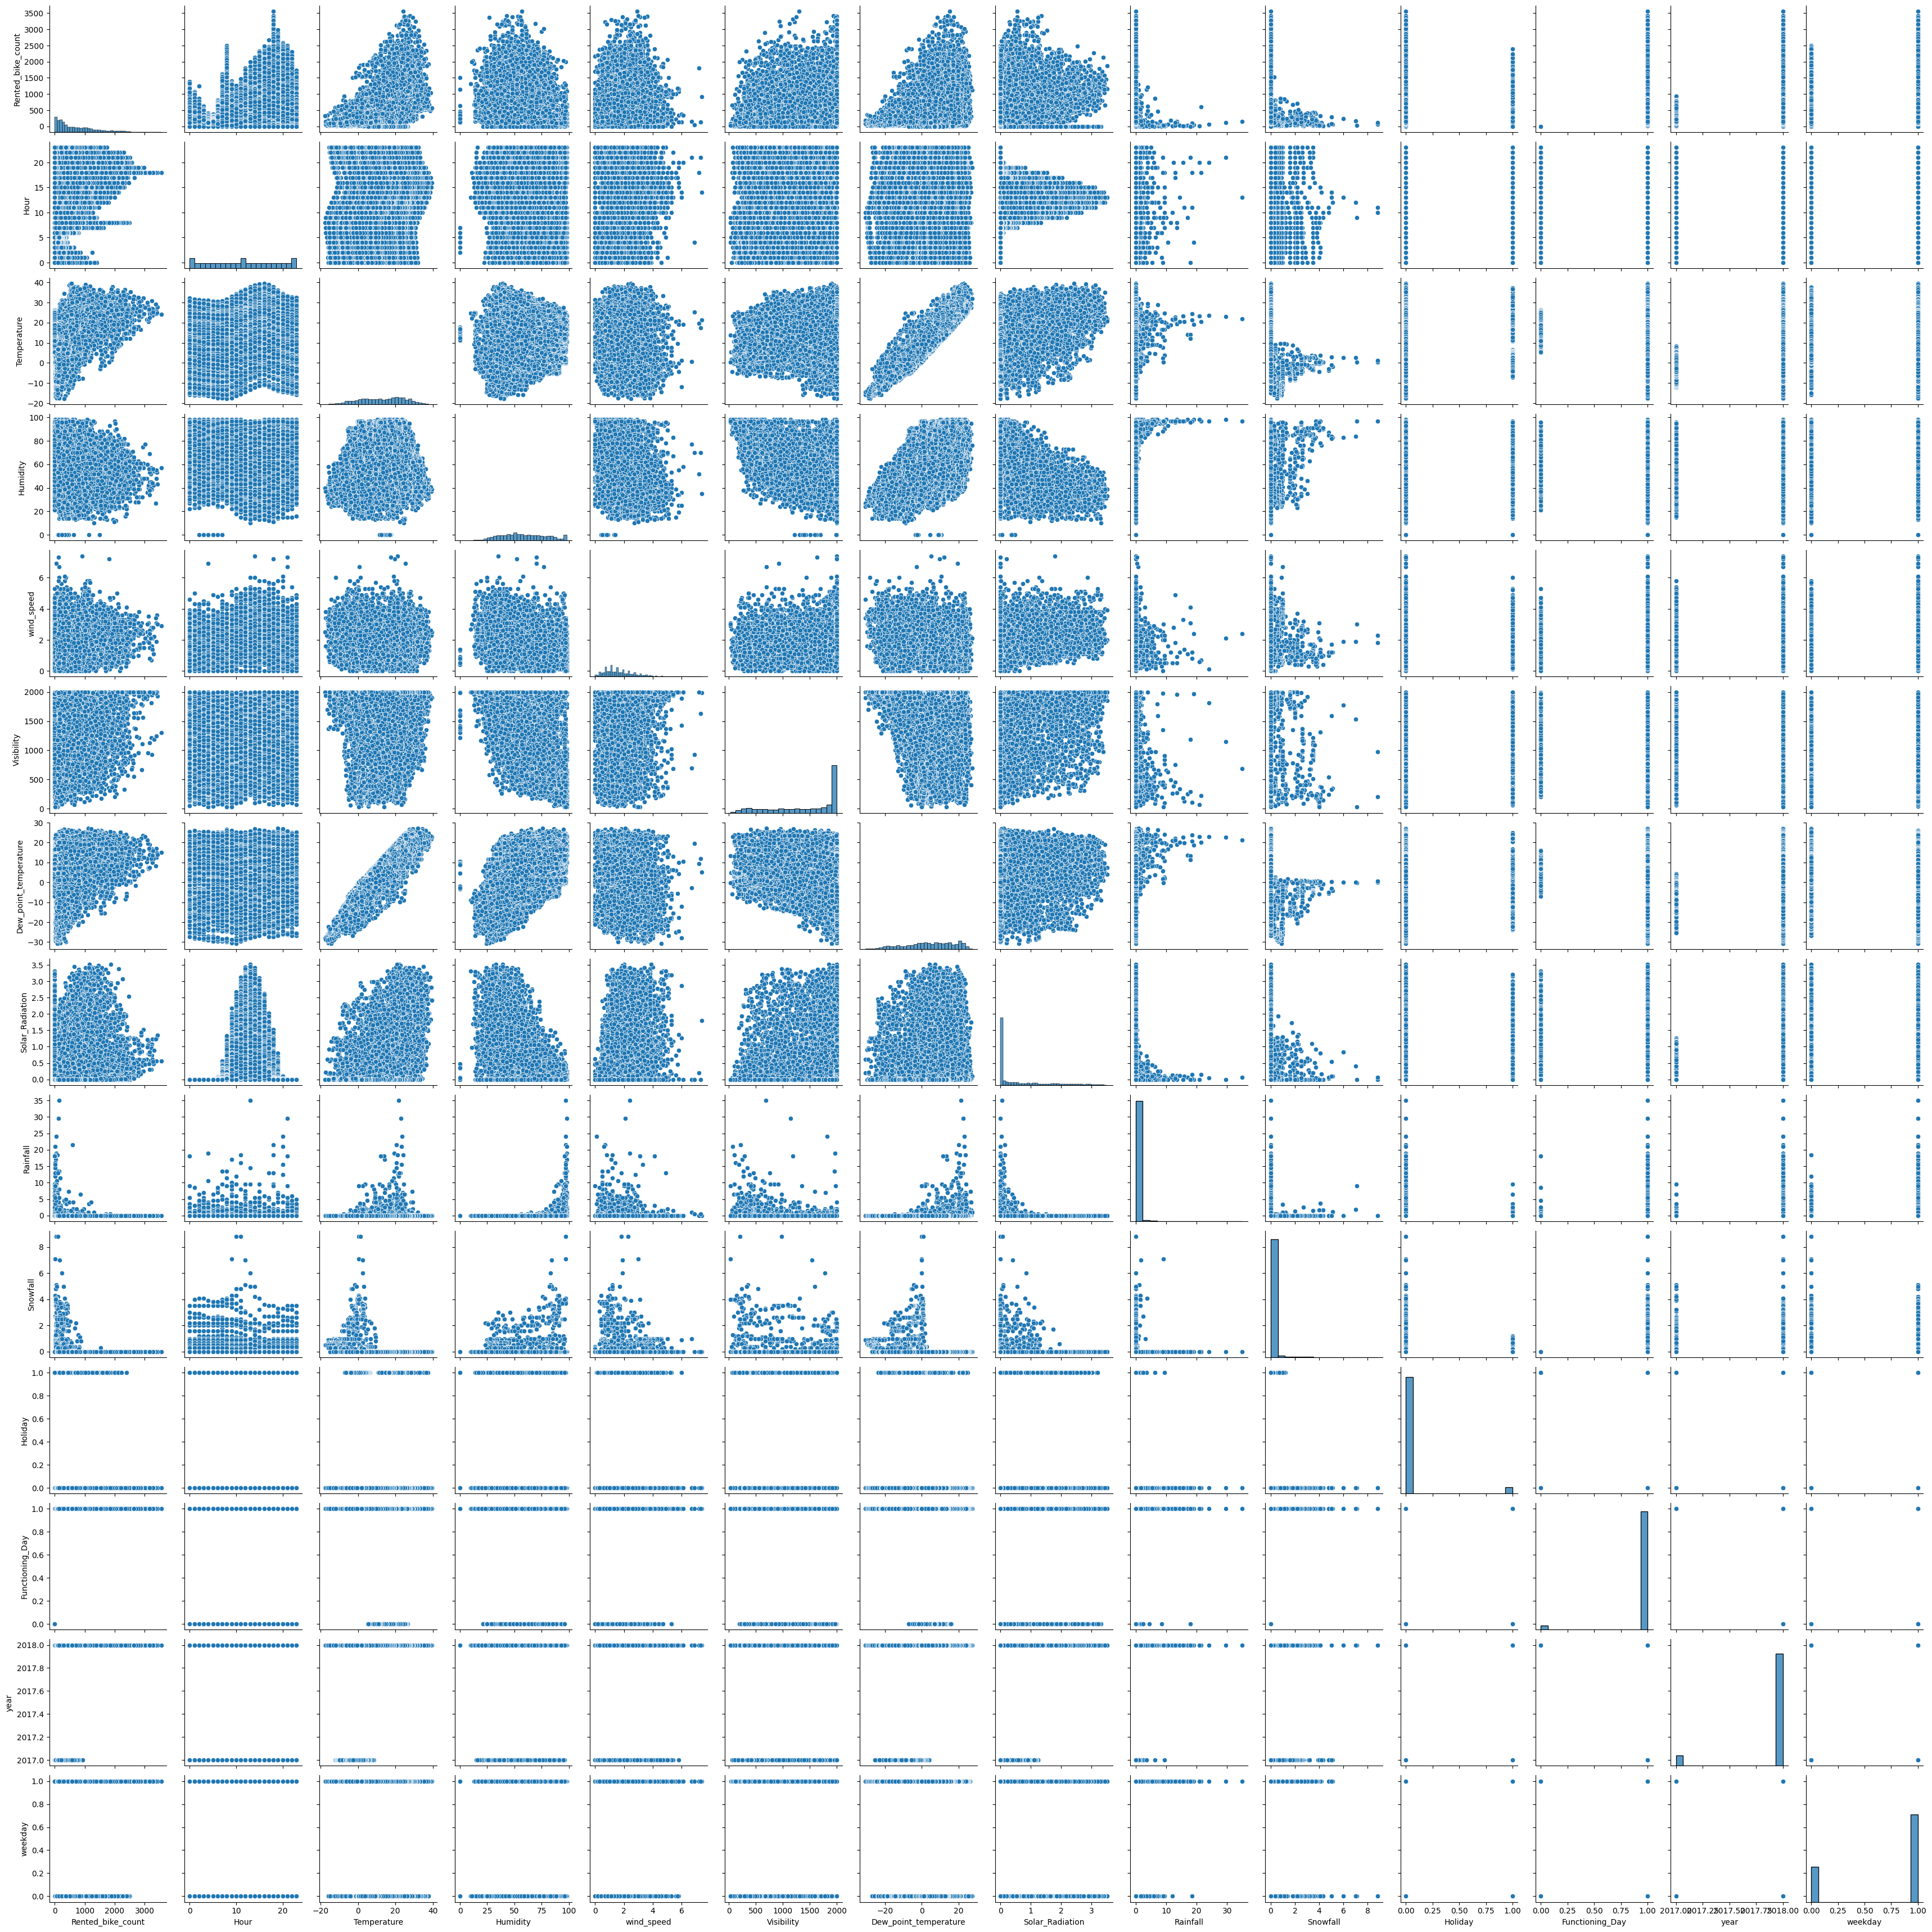

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(data=bike_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
#split the data into two groups: one for weekdays and one for weekends
weekday_rentals = bike_df.loc[bike_df['weekday'], 'Rented_bike_count']
weekend_rentals = bike_df.loc[~bike_df['weekday'], 'Rented_bike_count']

#perform a two-sample t-test to compare the means of the two groups
t,p = ztest(weekday_rentals, weekend_rentals)

# Print the results
print('t-statistic:', t)
print('p-value:', p)


t-statistic: 3.415044819241552
p-value: 0.0006377151729642665


In [ ]:
# Determine if the p-value is significant at the 5% level
if p < 0.05:
    print('Reject the null hypothesis:')
    print('The mean number of bike rentals is significantly different on weekends compared to weekdays.')
else:
    print('Fail to reject the null hypothesis:')

Reject the null hypothesis:
The mean number of bike rentals is significantly different on weekends compared to weekdays.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Separate the data into four groups (one for each season)
spring_rentals = bike_df.loc[bike_df['Seasons'] == 'Spring', 'Rented_bike_count']
summer_rentals = bike_df.loc[bike_df['Seasons'] == 'Summer', 'Rented_bike_count']
fall_rentals = bike_df.loc[bike_df['Seasons'] == 'Autumn', 'Rented_bike_count']
winter_rentals = bike_df.loc[bike_df['Seasons'] == 'Winter', 'Rented_bike_count']

In [ ]:
# Perform an ANOVA test
f_statistic, p_value = f_oneway(spring_rentals, summer_rentals, fall_rentals, winter_rentals)

print('F-statistic:', f_statistic)
print('p-value:', p_value)

F-statistic: 776.4678149879506
p-value: 0.0


In [ ]:
# Determine if the p-value is significant at the 5% level
if p_value < 0.05:
    print('We reject the null hypothesis:')
else:
    print('We fail to reject the null hypothesis:')

We reject the null hypothesis:


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
bike_df.isnull().sum()

Date                     0
Rented_bike_count        0
Hour                     0
Temperature              0
Humidity                 0
wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
day_of_week              0
month                    0
year                     0
weekday                  0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
numerical_columns

['Temperature',
 'Humidity',
 'wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall']

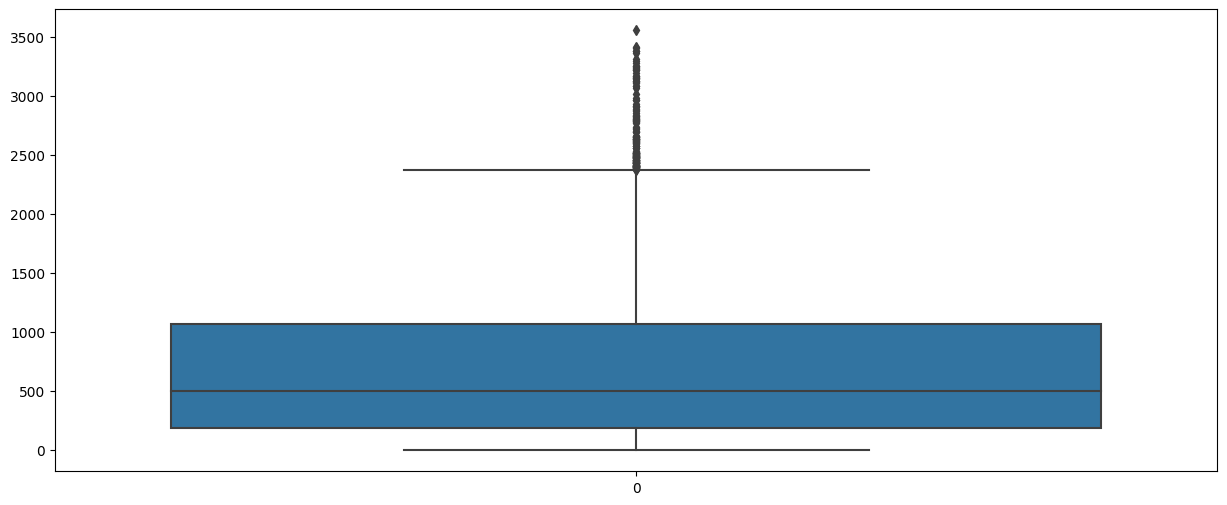

In [ ]:
plt.subplots(figsize=(15,6))
sns.boxplot(data=bike_df['Rented_bike_count'])
plt.show()

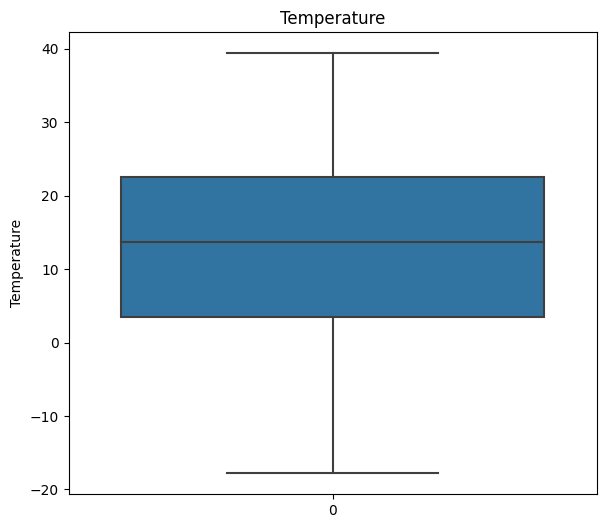

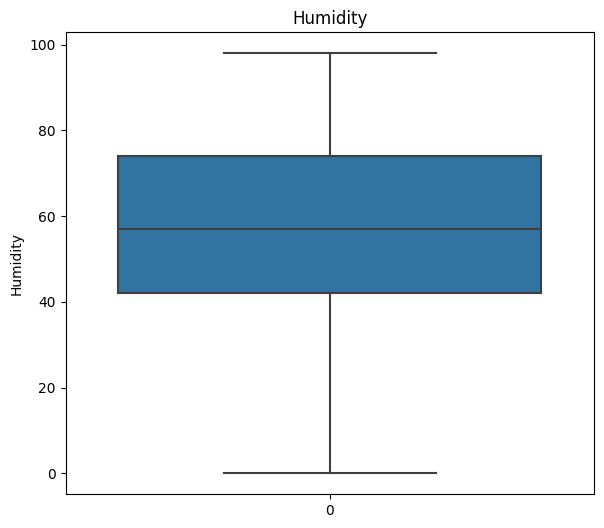

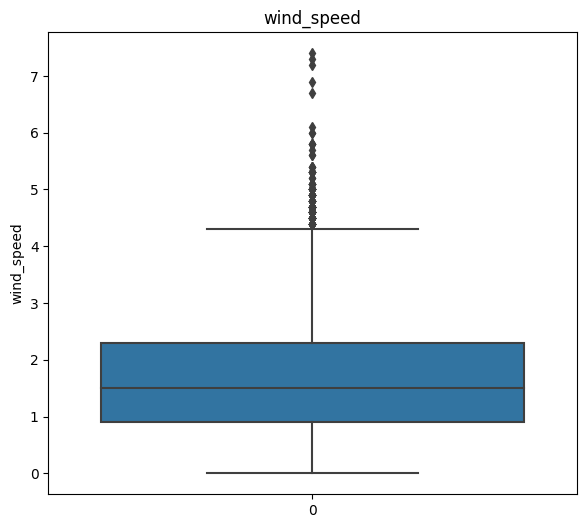

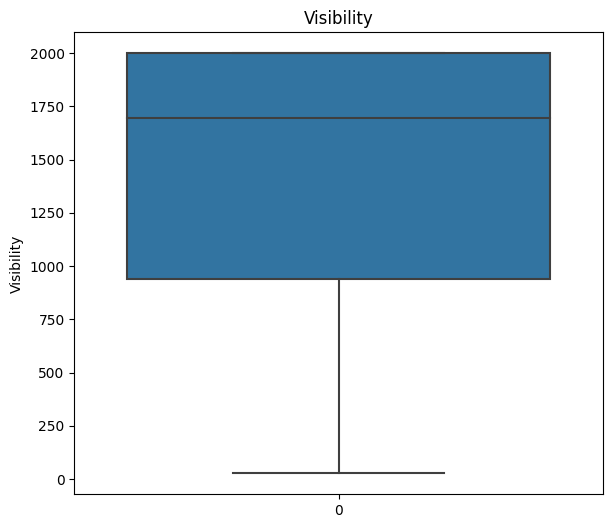

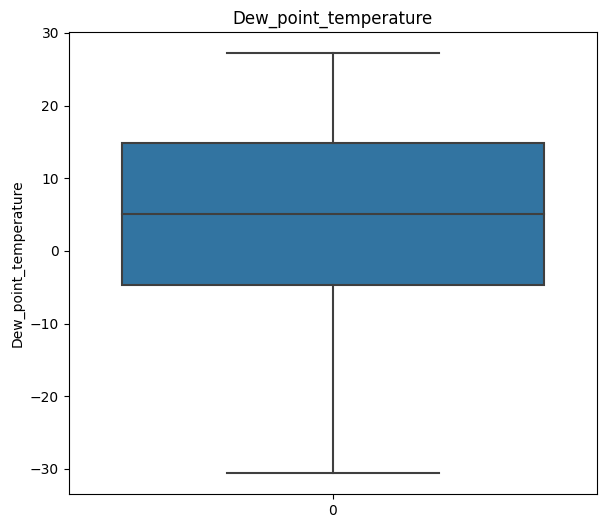

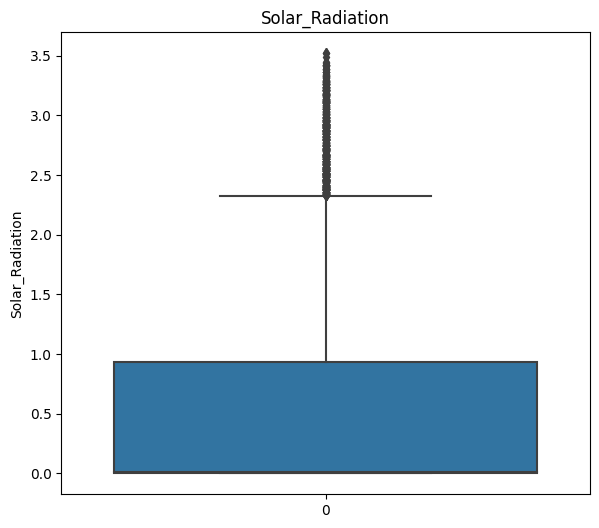

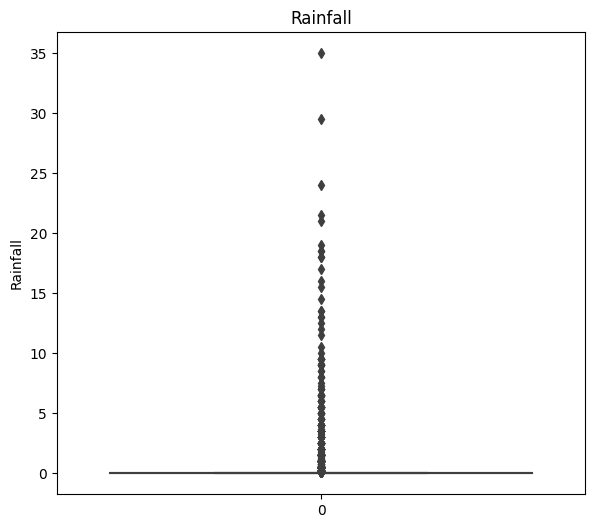

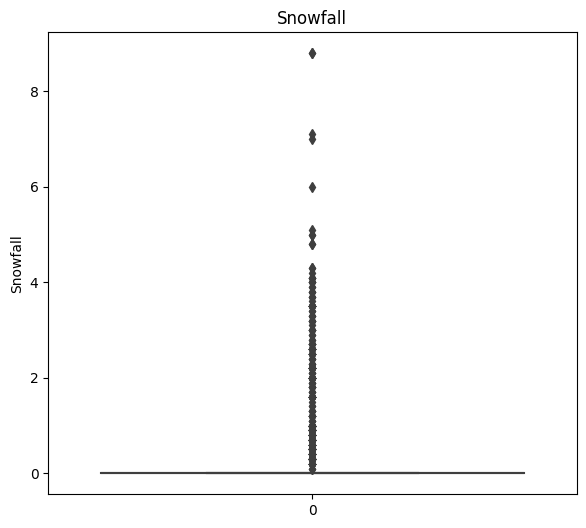

In [ ]:
from scipy.stats import norm

# Removing "Date" variable from numerical variable
num_var=[var for var in numerical_columns]

# Plotting Box and Distribution plot 
for var in num_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=bike_df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)
    plt.show()

In [ ]:
outlier_var=['Rented_bike_count', 'wind_speed', 'Solar_Radiation']

In [ ]:
for i in outlier_var:
    # Findling IQR
    Q1=bike_df[i].quantile(0.25)
    Q3=bike_df[i].quantile(0.75)
    IQR=Q3-Q1
    
    # Defining upper and lower limit
    lower_limit =bike_df[i].quantile(0.25)-1.5*IQR
    upper_limit =bike_df[i].quantile(0.75)+1.5*IQR
    
    # Applying lower and upper limit to each variables
    bike_df.loc[(bike_df[i] > upper_limit),i] = upper_limit
    bike_df.loc[(bike_df[i] < lower_limit),i] = lower_limit

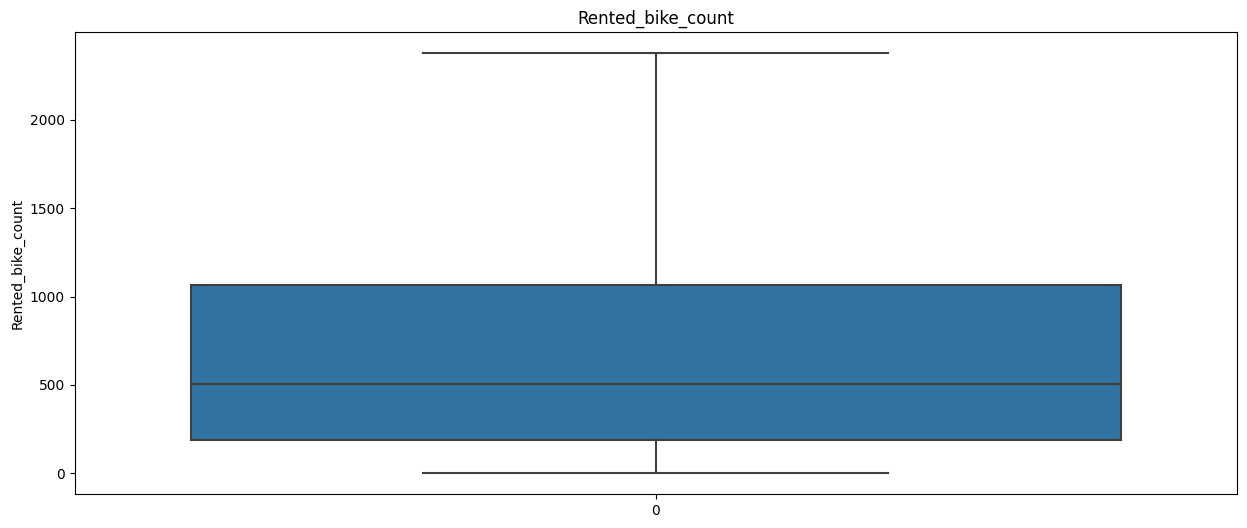

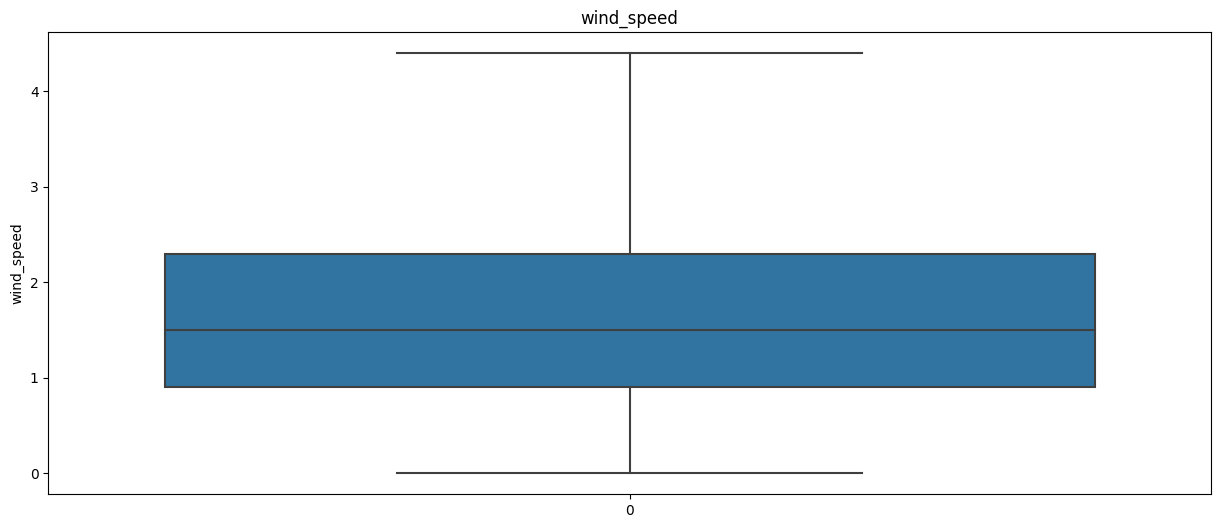

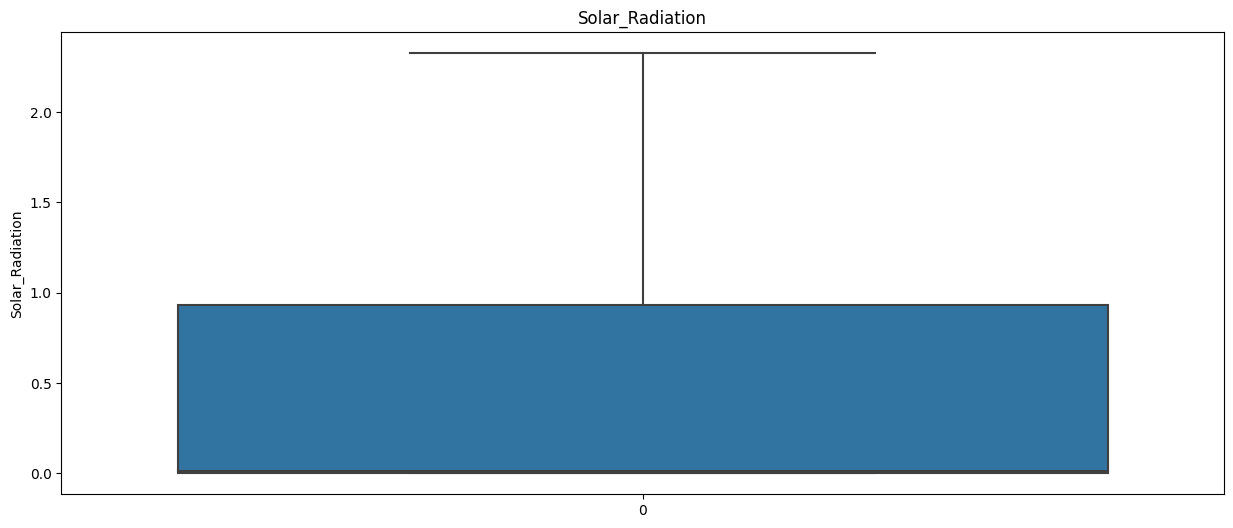

In [ ]:

for var in outlier_var:
    plt.subplots(figsize=(15,6))
    
    ax=sns.boxplot(data=bike_df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)
  
    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df=bike_df.copy()

In [ ]:
df.columns

Index(['Date', 'Rented_bike_count', 'Hour', 'Temperature', 'Humidity',
       'wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day',
       'day_of_week', 'month', 'year', 'weekday'],
      dtype='object')

In [ ]:
new_df = df.drop(columns=['Date','Dew_point_temperature','weekday','year'])

#### 2. Feature Selection

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(new_df[[i for i in new_df.describe().columns if i not in ['Rented_bike_count'] ]])

variables        VIF
0             Hour   4.132867
1      Temperature   3.358045
2         Humidity  11.155279
3       wind_speed   4.881680
4       Visibility   6.542725
5  Solar_Radiation   2.508925
6         Rainfall   1.082280
7         Snowfall   1.120857
8          Holiday   1.055332
9  Functioning_Day  18.756969

In [ ]:
new_df =new_df.drop(columns=['Functioning_Day'])


In [ ]:
calc_vif(new_df[[i for i in new_df.describe().columns ]])

variables        VIF
0   Rented_bike_count   4.765719
1                Hour   4.739584
2         Temperature   5.060138
3            Humidity  12.881453
4          wind_speed   4.881748
5          Visibility   6.546460
6     Solar_Radiation   2.559619
7            Rainfall   1.105124
8            Snowfall   1.121010
9             Holiday   1.061117
10    Functioning_Day  21.013382

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 3. Categorical Encoding

In [ ]:
new_df.columns

Index(['Rented_bike_count', 'Hour', 'Temperature', 'Humidity', 'wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning_Day', 'day_of_week', 'month'],
      dtype='object')

In [ ]:
cols=['Hour']
for col in cols:
  df[col]=df[col].astype('category')

In [ ]:
new_df['Hour']=new_df['Hour'].astype('category')

In [ ]:
# Encode your categorical columns
categorical_features=list(new_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Seasons', 'day_of_week', 'month'], dtype='object')

In [ ]:
new_df = pd.get_dummies(new_df, columns=['month','day_of_week','Hour','Seasons'], prefix=[None,None,'hour',None])

In [ ]:
new_df.columns


Index(['Rented_bike_count', 'Temperature', 'Humidity', 'wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Holiday',
       'Functioning_Day', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September',
       'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'Autumn',
       'Spring', 'Summer', 'Winter'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

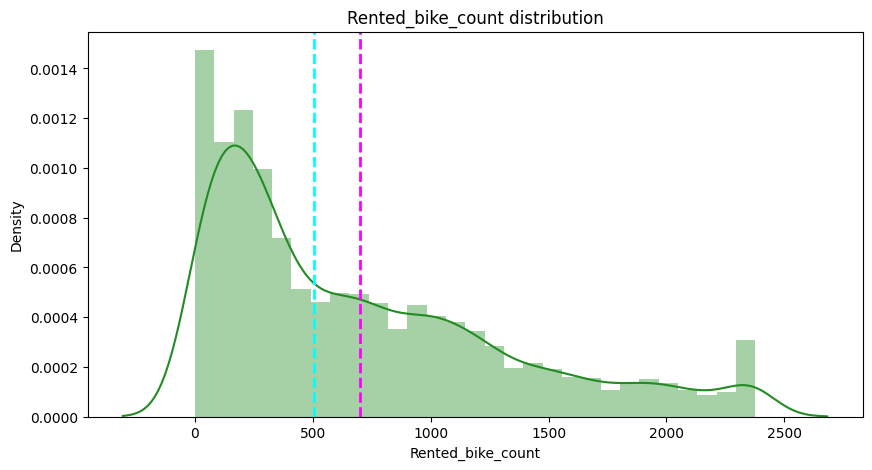

In [ ]:
# Transform Your data
# Transform Your data
plt.figure(figsize=(10,5))
sns.distplot(new_df['Rented_bike_count'],color='forestgreen')
plt.xlabel('Rented_bike_count')
plt.title('Rented_bike_count distribution')
plt.axvline(new_df['Rented_bike_count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(new_df['Rented_bike_count'].median(), color='cyan', linestyle='dashed', linewidth=2)

In [ ]:
new_df['Rented_bike_count'].skew()

1.0032657583531357

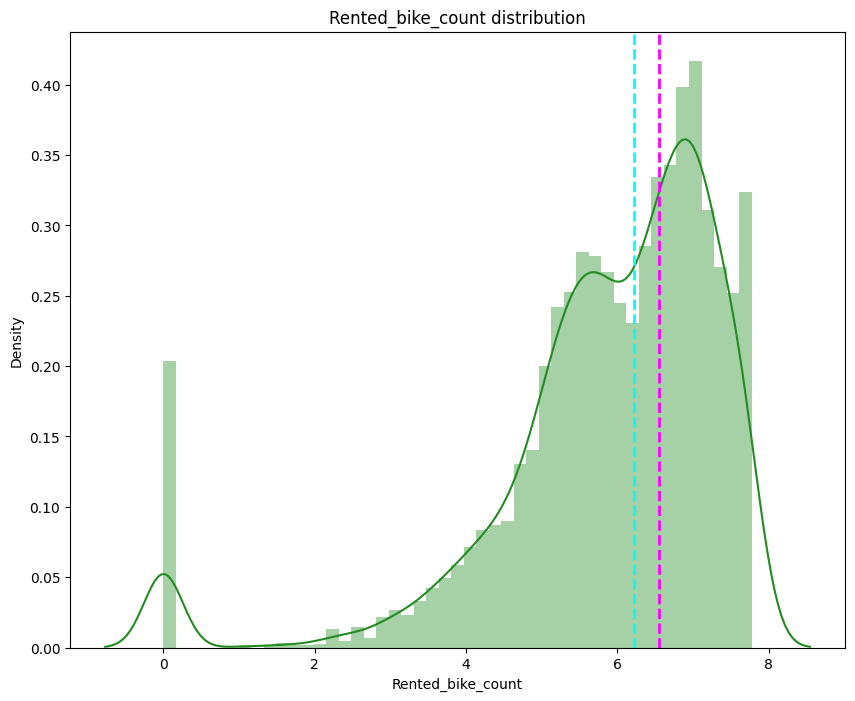

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(np.log1p(new_df['Rented_bike_count']),color='forestgreen')
plt.xlabel('Rented_bike_count')
plt.title('Rented_bike_count distribution')
plt.axvline(np.log1p(new_df['Rented_bike_count'].mean()), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(new_df['Rented_bike_count'].median()), color='cyan', linestyle='dashed', linewidth=2)

In [ ]:
(np.log1p(new_df['Rented_bike_count'])).skew()

-1.8443633663177204

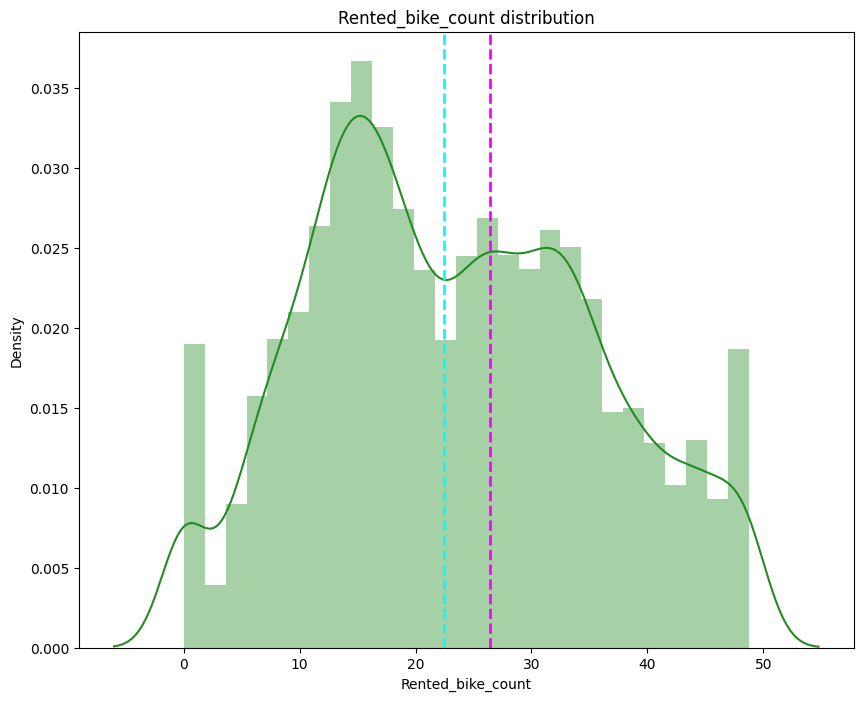

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(new_df['Rented_bike_count']),color='forestgreen')
plt.xlabel('Rented_bike_count')
plt.title('Rented_bike_count distribution')
plt.axvline(np.sqrt(new_df['Rented_bike_count'].mean()), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.sqrt(new_df['Rented_bike_count'].median()), color='cyan', linestyle='dashed', linewidth=2)

In [ ]:
(np.sqrt(new_df['Rented_bike_count'])).skew()

0.1864036222134771

KeyError: ignored

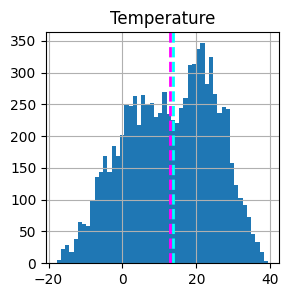

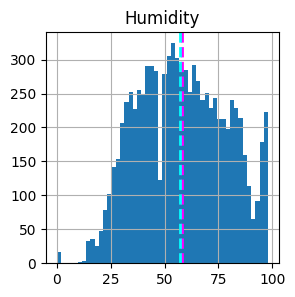

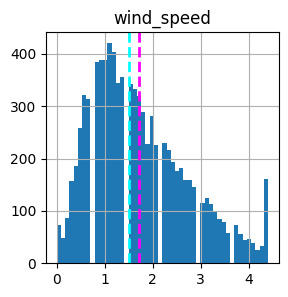

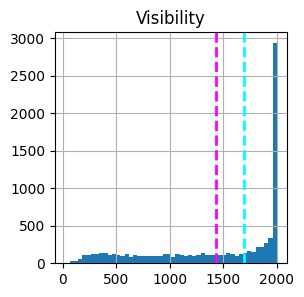

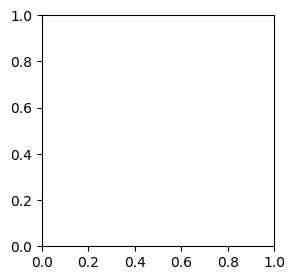

In [ ]:
for col in numerical_columns:
    fig = plt.figure(figsize=(3,3))
    ax = fig.gca()
    feature = new_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

### 8. Data Splitting

In [ ]:
X = new_df.drop(columns=['Rented_bike_count'], axis=1)
y = np.sqrt(new_df['Rented_bike_count'])

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print(X_test.shape)
print(X_test.shape)

(2190, 56)
(2190, 56)


##### What data splitting ratio have you used and why? 

Answer Here.

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:5]

array([[0.375     , 0.84693878, 0.25      , 0.18149466, 0.        ,
        0.        , 0.04545455, 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.7306338 , 0.47959184, 0.52272727, 0.24758516, 1.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.     

In [ ]:
X_test[0:5]

array([[0.49647887, 0.74489796, 0.29545455, 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.69014085, 0.79591837, 0.22727273, 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.     

##### Which method have you used to scale you data and why?

answer here

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### 1-Linear Regression

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

reg.score(X_train, y_train)


0.7756113773461404

In [ ]:
reg.coef_

array([ 2.84761754e+01, -1.18810784e+01, -2.79282164e-01,  1.93591284e+00,
        3.12892678e+00, -5.11662405e+01, -1.16453923e+00, -3.31135697e+00,
        2.84249203e+01, -9.84467256e+12, -2.08701823e+11,  2.60582689e+11,
        2.60582689e+11,  2.60582689e+11, -2.08701823e+11, -2.08701823e+11,
       -9.84467256e+12, -9.84467256e+12,  1.19847961e+12,  1.19847961e+12,
        1.19847961e+12, -1.71112443e+12, -1.71112443e+12, -1.71112443e+12,
       -1.71112443e+12, -1.71112443e+12, -1.71112443e+12, -1.71112443e+12,
       -6.77916000e+11, -6.77916000e+11, -6.77916000e+11, -6.77916000e+11,
       -6.77916000e+11, -6.77916000e+11, -6.77916000e+11, -6.77916000e+11,
       -6.77916000e+11, -6.77916000e+11, -6.77916000e+11, -6.77916000e+11,
       -6.77916000e+11, -6.77916000e+11, -6.77916000e+11, -6.77916000e+11,
       -6.77916000e+11, -6.77916000e+11, -6.77916000e+11, -6.77916000e+11,
       -6.77916000e+11, -6.77916000e+11, -6.77916000e+11, -6.77916000e+11,
       -2.03036809e+13, -

In [ ]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

LR_train_mse=mean_squared_error(y_train,y_pred_train)
print("MSE:",LR_train_mse)

LR_train_rmse=np.sqrt(LR_train_mse)
print("RMSE:",LR_train_rmse)

LR_train_mae=mean_absolute_error(y_train,y_pred_train)
print("MAE:",LR_train_mae)

MSE: 33.857186469376366
RMSE: 5.81869284886016
MAE: 4.392850318485396


In [ ]:
from sklearn.metrics import r2_score
LR_train_R2=r2_score(y_train,y_pred_train)
print("R2:",LR_train_R2)
Adjusted_LR_train_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('adjusted R2:',Adjusted_LR_train_R2)

R2: 0.7756113773461404
adjusted R2: 0.7697202555136903


In [ ]:
from sklearn.metrics import mean_squared_error

LR_test_mse=mean_squared_error(y_test,y_pred_test)
print("MSE:",LR_test_mse)

LR_test_rmse=np.sqrt(LR_test_mse)
print("RMSE:",LR_test_rmse)

LR_test_mae=mean_absolute_error(y_test,y_pred_test)
print("MAE:",LR_test_mae)

MSE: 32.06715510015032
RMSE: 5.662786866919002
MAE: 4.326600786081978


In [ ]:
from sklearn.metrics import r2_score
LR_test_R2=r2_score(y_test,y_pred_test)
print("R2:",LR_test_R2)
Adjusted_LR_test_R2 = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('adjusted R2:',Adjusted_LR_test_R2)

R2: 0.792546015503363
adjusted R2: 0.7870994973918713


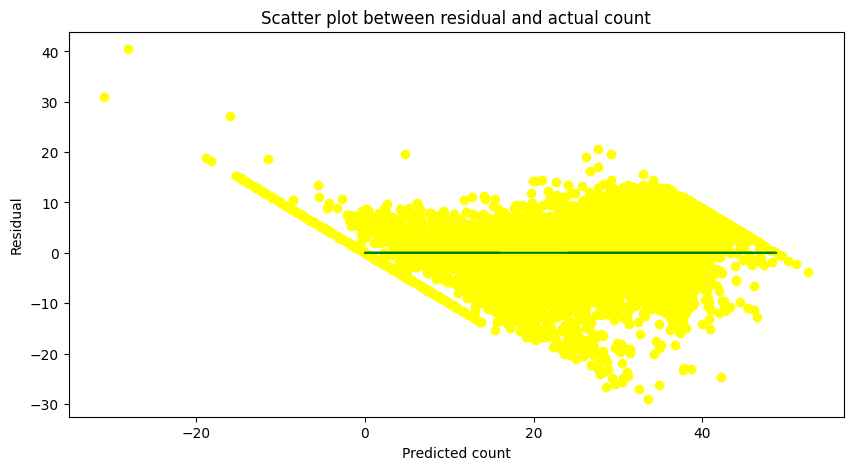

In [ ]:
#checking for heteroscedasticity
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

plt.subplots(figsize=(10,5))
plt.scatter(y_pred_train, residuals_train,c='yellow')
plt.plot(y, [0]*len(y),color='green')
plt.title('Scatter plot between residual and actual count')
plt.xlabel('Predicted count')
plt.ylabel('Residual')
plt.show()

In [ ]:
round((np.mean(residuals_train)))

0

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

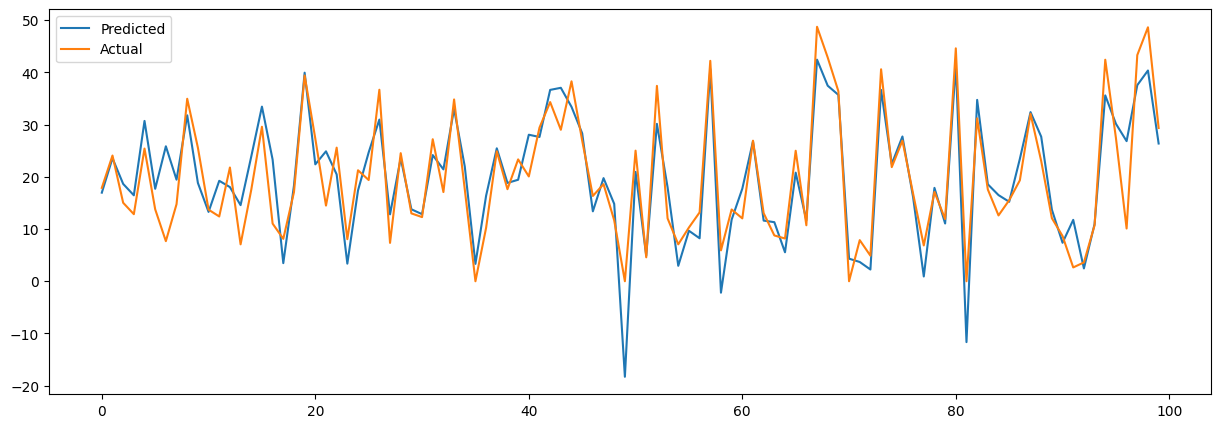

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(15,5))
plt.plot(y_pred_test[0:100])
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

There is no alpha value in Linear regression. We use hyperparameter tuning next 2 algorithms.

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 2- Lasso Regression (L1)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.16572236036339527 0.18018848047826053


In [ ]:
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
lasso_train_mse=mean_squared_error(y_train,y_pred_train_lasso)
print('MSE:',lasso_train_mse)
lasso_train_rmse=np.sqrt(lasso_train_mse)
print('RMSE:',lasso_train_rmse)

lasso_train_mae=mean_absolute_error(y_train,y_pred_train_lasso)
print('MAE:',lasso_train_mae)

MSE: 123.69839057752638
RMSE: 11.121977817705194
MAE: 8.880241219518913


In [ ]:
lasso_train_r2=r2_score(y_train,y_pred_train_lasso)
print('R2:',lasso_train_r2)

Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

R2: 0.18018848047826053
Adjusted R2 : 0.15866506505715539


In [ ]:
lasso_test_mse=mean_squared_error(y_test,y_pred_test_lasso)
print('MSE:',lasso_test_mse)
lasso_test_rmse=np.sqrt(lasso_test_mse)
print('RMSE:',lasso_test_rmse)

lasso_test_mae=mean_absolute_error(y_test,y_pred_test_lasso)
print('MAE:',lasso_test_mae)

MSE: 128.95828697495088
RMSE: 11.355980229594929
MAE: 9.047409910443575


In [ ]:
lasso_test_r2=r2_score(y_test,y_pred_test_lasso)
print('R2:',lasso_test_r2)

Adjusted_R2_l = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

R2: 0.16572236036339527
Adjusted R2 : 0.14381914994630673


In [ ]:
residuals_train_lasso = y_train - y_pred_train_lasso
residuals_test_lasso = y_test - y_pred_test_lasso

In [ ]:
round((np.mean(residuals_train_lasso)))

0

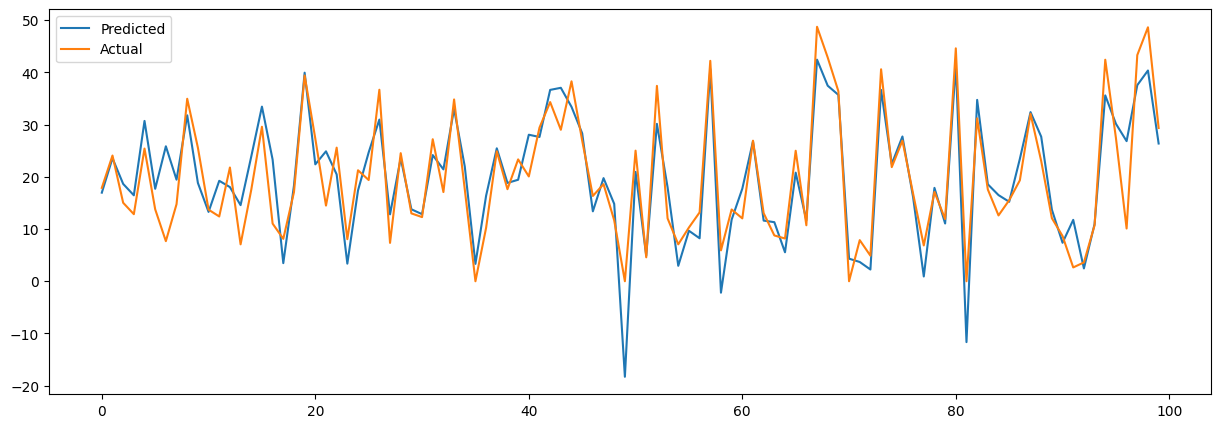

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y_pred_test[0:100])
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -34.483859849329725


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

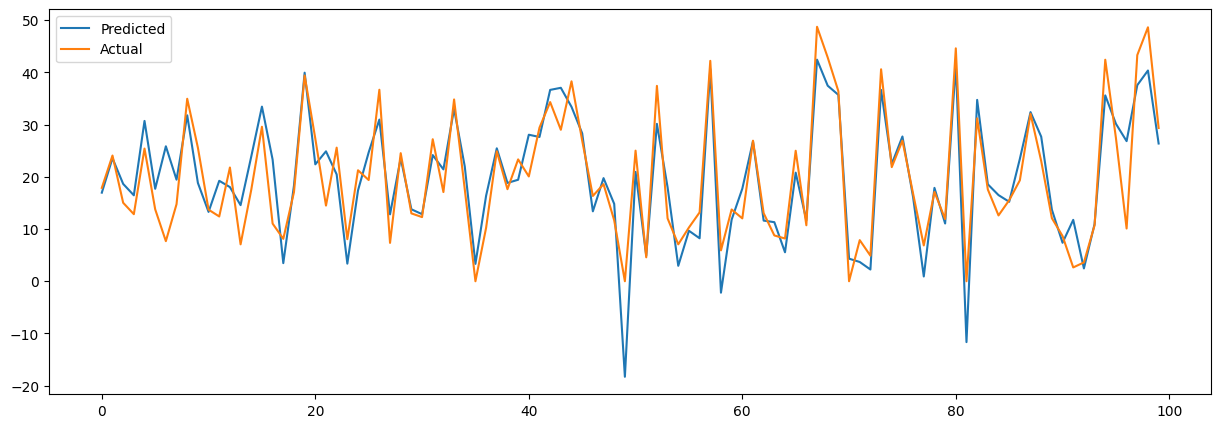

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y_pred_test[0:100])
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 32.069556870287826
RMSE : 5.662998929038202
R2 : 0.7925304775866593
Adjusted R2 :  0.7870835515411145


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)

ridge.fit(X_train,y_train)
ridge.score(X_train,y_train)

0.7756105118766716

In [ ]:
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
ridge_train_mse=mean_squared_error(y_train,y_pred_train_ridge)
print('MSE:',ridge_train_mse)
ridge_train_rmse=np.sqrt(ridge_train_mse)
print('RMSE:',ridge_train_rmse)

ridge_train_mae=mean_absolute_error(y_train,y_pred_train_ridge)
print('MAE:',ridge_train_mae)

MSE: 33.85731705692951
RMSE: 5.818704070231576
MAE: 4.39463192057345


In [ ]:
ridge_train_r2=r2_score(y_train,y_pred_train_ridge)
print('R2:',ridge_train_r2)

Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )

R2: 0.7756105118766716
Adjusted R2 : 0.7736811688189553


In [ ]:
ridge_test_mse=mean_squared_error(y_test,y_pred_test_ridge)
print('MSE:',ridge_test_mse)
ridge_test_rmse=np.sqrt(ridge_test_mse)
print('RMSE:',ridge_test_rmse)

ridge_test_mae=mean_absolute_error(y_test,y_pred_test_ridge)
print('MAE:',ridge_test_mae)

MSE: 32.09172891757807
RMSE: 5.664956214974487
MAE: 4.329092438536519


In [ ]:
ridge_test_r2=r2_score(y_test,y_pred_test_ridge)
print('R2:',ridge_test_r2)

Adjusted_R2_l = (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

R2: 0.7923870386211371
Adjusted R2 : 0.7869363467143315


In [ ]:
residuals_train_ridge = y_train - y_pred_train_ridge
residuals_test_ridge = y_test - y_pred_test_ridge

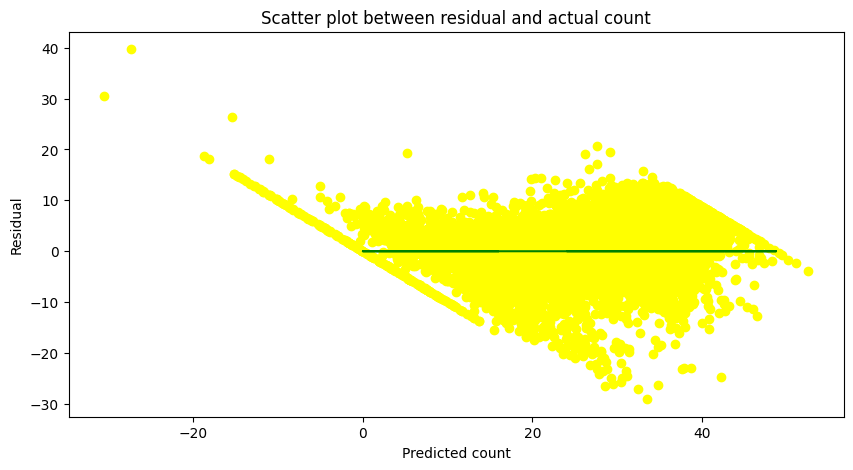

In [ ]:
plt.subplots(figsize=(10,5))
plt.scatter(y_pred_train_ridge, residuals_train_ridge,c='yellow')
plt.plot(y, [0]*len(y),color='green')
plt.title('Scatter plot between residual and actual count')
plt.xlabel('Predicted count')
plt.ylabel('Residual')
plt.show()

In [ ]:
round((np.mean(residuals_train_ridge)))

0

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

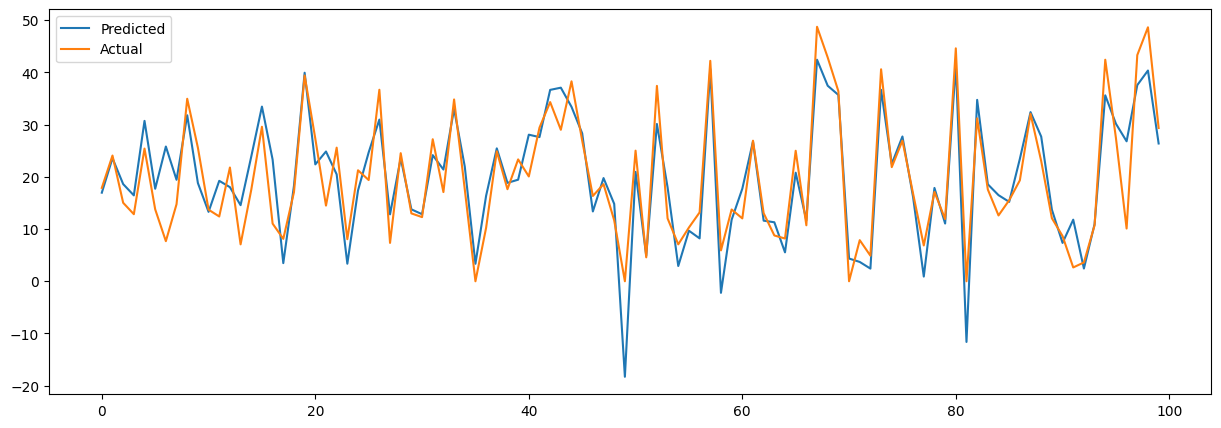

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(15,5))
plt.plot((y_pred_test_ridge[0:100]))
plt.plot((np.array(y_test[0:100])))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -34.483855242545104


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 32.06982691566547
RMSE : 5.663022771953639
R2 : 0.7925287305657773
Adjusted R2 :  0.7870817586537677


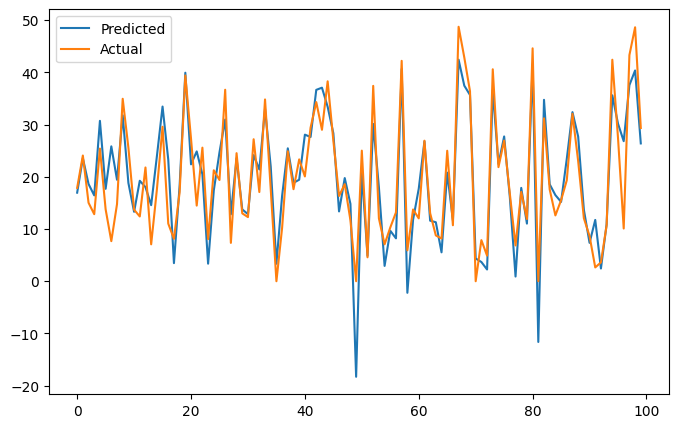

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_ridge[0:100]))
plt.plot((np.array(y_test[0:100])))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### Random Forest Classifier

In [ ]:
# Create an instance of the RandomForestClassifier

from sklearn.ensemble import RandomForestRegressor
ensemble_regressor = RandomForestRegressor()


In [ ]:

ensemble_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_train_rf = ensemble_regressor.predict(X_train)
y_pred_test_rf = ensemble_regressor.predict(X_test)


In [ ]:
# Calculating accuracy on train and test
rf_train_mse=mean_squared_error(y_train,y_pred_train_rf)
print('MSE:',rf_train_mse)
rf_train_rmse=np.sqrt(rf_train_mse)
print('RMSE:',rf_train_rmse)

rf_train_mae=mean_absolute_error(y_train,y_pred_train_rf)
print('MAE:',rf_train_mae)

MSE: 1.581088888996171
RMSE: 1.2574135711833918
MAE: 0.8053749067287835


In [ ]:
rf_train_r2=r2_score(y_train,y_pred_train_rf)
print('R2:',rf_train_r2)

Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_rf))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )

R2: 0.9895213278157041
Adjusted R2 : 0.9894312302197698


In [ ]:
rf_test_mse=mean_squared_error(y_test,y_pred_test_rf)
print('MSE:',rf_test_mse)
rf_test_rmse=np.sqrt(rf_test_mse)
print('RMSE:',rf_test_rmse)

rf_test_mae=mean_absolute_error(y_test,y_pred_test_rf)
print('MAE:',rf_test_mae)

MSE: 12.474047179015171
RMSE: 3.5318617157265897
MAE: 2.1991781175960203


In [ ]:
rf_test_r2=r2_score(y_test,y_pred_test_rf)
print('R2:',rf_test_r2)

Adjusted_R2_l = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

R2: 0.9193008927045854
Adjusted R2 : 0.9171822100939229


In [ ]:
residuals_train_rf = y_train - y_pred_train_rf
residuals_test_rf = y_test - y_pred_test_rf

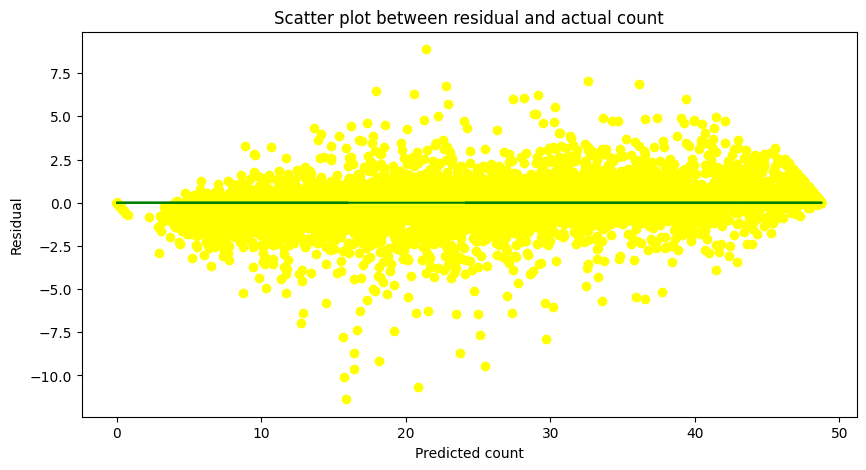

In [ ]:
plt.subplots(figsize=(10,5))
plt.scatter(y_pred_train_rf, residuals_train_rf,c='yellow')
plt.plot(y, [0]*len(y),color='green')
plt.title('Scatter plot between residual and actual count')
plt.xlabel('Predicted count')
plt.ylabel('Residual')
plt.show()

In [ ]:
round((np.mean(residuals_train)))

0

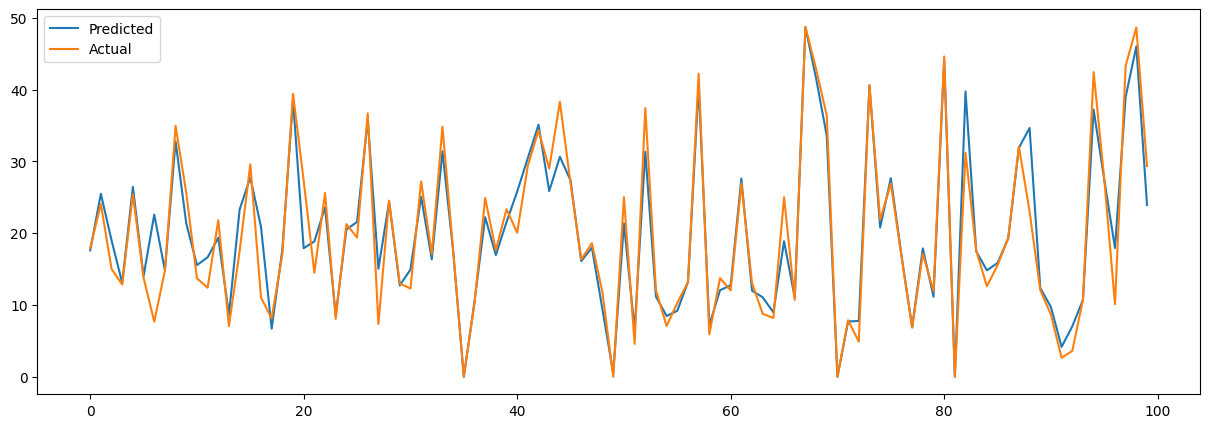

In [ ]:
plt.figure(figsize=(15,5))
plt.plot((y_pred_test_rf[0:100]))
plt.plot((np.array(y_test[0:100])))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
 #ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.ensemble import RandomForestRegressor
rf_cv = RandomForestRegressor(random_state=42)
param_dict = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
rf_reg = GridSearchCV(rf_cv, param_dict, verbose=1, scoring='neg_mean_squared_error', cv=5)
rf_reg.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
rf_reg_best_est=rf_reg.best_estimator_
print(f'The best estimator values : {rf_reg_best_est}')

The best estimator values : RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50,
                      random_state=42)


In [ ]:
# best fit values
rf_reg_best_params=rf_reg.best_params_
print(f'The best fit values: {rf_reg_best_params}')

The best fit values: {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


In [ ]:
rf_reg_score=rf_reg.best_score_
print(f" The negative mean squared error is: {rf_reg_score}")

 The negative mean squared error is: -34.97635004735571


In [ ]:
# Predicting results for train and test set
y_train_pred=rf_reg.predict(X_train)
y_test_pred=rf_reg.predict(X_test)

In [ ]:
rf_train_mse=mean_squared_error(y_train,y_train_pred)
print('MSE:',rf_train_mse)
rf_train_rmse=np.sqrt(rf_train_mse)
print('RMSE:',rf_train_rmse)

rf_train_mae=mean_absolute_error(y_train,y_train_pred)
print('MAE:',rf_train_mae)

MSE: 30.773054656458484
RMSE: 5.547346632080826
MAE: 4.193906432410071


In [ ]:
rf_train_r2=r2_score(y_train,y_train_pred)
print('R2:',rf_train_r2)

Adjusted_R2_l = (1-(1-r2_score(y_train, y_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )

R2: 0.7960514718061317
Adjusted R2 : 0.7942978839696728


In [ ]:
rf_test_mse=mean_squared_error(y_test,y_test_pred)
print('MSE:',rf_test_mse)
rf_test_rmse=np.sqrt(rf_test_mse)
print('RMSE:',rf_test_rmse)

rf_test_mae=mean_absolute_error(y_test,y_test_pred)
print('MAE:',rf_test_mae)

MSE: 34.3395211025319
RMSE: 5.859993268130254
MAE: 4.382856520377081


In [ ]:
rf_testr2=r2_score(y_test,y_test_pred)
print('R2:',rf_testr2)

Adjusted_R2_l = (1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

R2: 0.7778452607916816
Adjusted R2 : 0.7720127875635213


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred_train_rf, y_pred_test_rf)

ValueError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
labels = [X, y]
cm = confusion_matrix(y_train, y_train_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 16.5 MB/s eta 0:00:00


In [ ]:
#Get shap values
import shap 
explainer = shap.Explainer(ensemble_regressor )
shap_values = explainer(X_test) 

In [ ]:
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X_test)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X_test.columns))

AttributeError: ignored

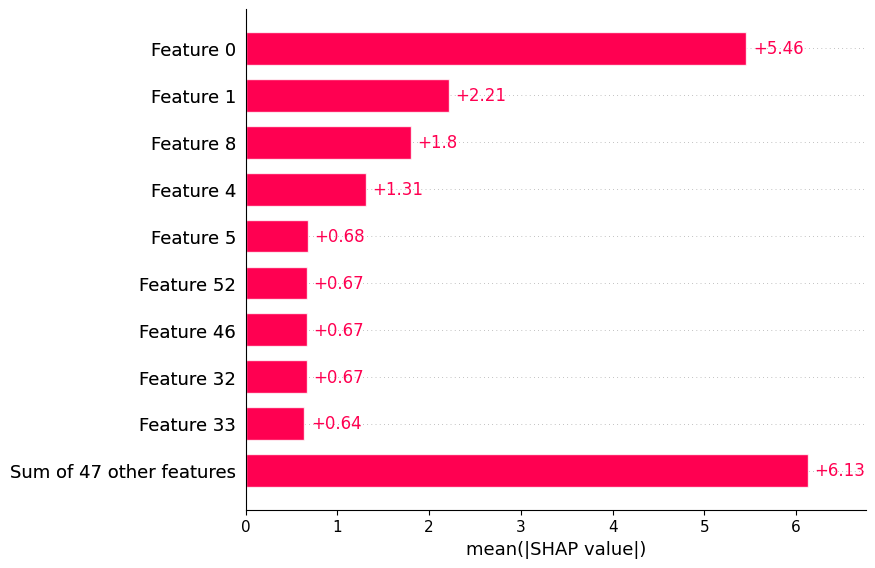

In [ ]:
shap.plots.bar(shap_values)

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***